In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import *

In [2]:
# 변수의 특성 중요도 계산하기
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df

In [3]:
file1 = r'.\rawfiles\data01_train.csv'
file2 = r'.\rawfiles\features.csv'

data = pd.read_csv(file1)
features = pd.read_csv(file2)

In [4]:
# Activity 숫자로 변환
data['Activity_num'] = data['Activity'].map({'WALKING':0,
                                             'WALKING_UPSTAIRS':1,
                                             'WALKING_DOWNSTAIRS':2,
                                             'LAYING':3,
                                             'STANDING':4,
                                             'SITTING':5})
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_num
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,4
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,3
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,4
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,0
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,2


In [5]:
features.head()

,sensor,agg,axis,feature_name
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z
3,tBodyAcc,std(),X,tBodyAcc-std()-X
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y


In [6]:
#전체 데이터의 행,열 개수 확인
print('전체 데이터의 행 개수: ', len(data.index))
print('전체 데이터의 열 개수: ', len(data.columns))

전체 데이터의 행 개수:  5881
전체 데이터의 열 개수:  564


In [7]:
#전체 데이터의 상위 5개 행 확인
data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_num
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,4
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,3
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,4
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,0
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,2


In [8]:
#전체 데이터의 수치형 변수 분포 확인
numberic_data = data.select_dtypes(include=['int', 'float'])
print(numberic_data.describe())

       tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count        5881.000000        5881.000000        5881.000000   
mean            0.274811          -0.017799          -0.109396   
std             0.067614           0.039422           0.058373   
min            -0.503823          -0.684893          -1.000000   
25%             0.262919          -0.024877          -0.121051   
50%             0.277154          -0.017221          -0.108781   
75%             0.288526          -0.010920          -0.098163   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count       5881.000000       5881.000000       5881.000000       5881.000000   
mean          -0.603138         -0.509815         -0.604058         -0.628151   
std            0.448807          0.501815          0.417319          0.424345   
min           -1.000000         -0.999844         -0.999667         -1.000000   


In [9]:
#전체 데이터의 모든 변수 확인
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'Activity_num'],
      dtype='object', length=564)

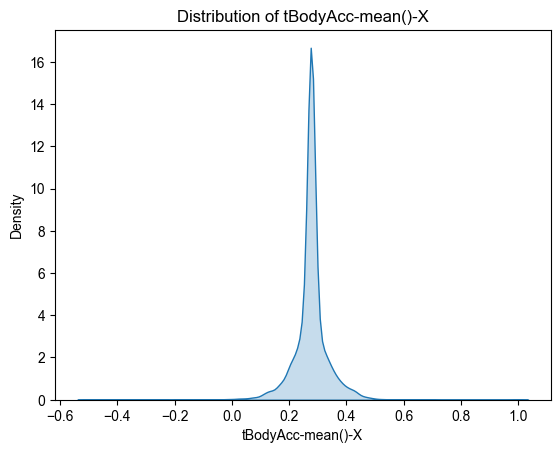

In [10]:
# kde로 tBodyAcc-mean()-X 분포 확인하기 (단변량 분석)
plt.rcParams['font.family'] = 'Arial'

sns.kdeplot(data['tBodyAcc-mean()-X'], fill=True)
plt.title('Distribution of tBodyAcc-mean()-X')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('Density')
plt.show()

In [11]:
# 전체 데이터의 이변량 분석 (corr)
corr = numberic_data.corr()
print(corr)

                      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
tBodyAcc-mean()-X              1.000000           0.203297          -0.266383   
tBodyAcc-mean()-Y              0.203297           1.000000          -0.145709   
tBodyAcc-mean()-Z             -0.266383          -0.145709           1.000000   
tBodyAcc-std()-X               0.012067          -0.049467          -0.024839   
tBodyAcc-std()-Y              -0.018489          -0.052489          -0.017613   
...                                 ...                ...                ...   
angle(X,gravityMean)          -0.027010           0.000039           0.007045   
angle(Y,gravityMean)           0.028177           0.002376          -0.017900   
angle(Z,gravityMean)           0.019025          -0.022329          -0.019169   
subject                        0.027597           0.006299          -0.000459   
Activity_num                   0.012249           0.065975           0.045042   

                      tBody

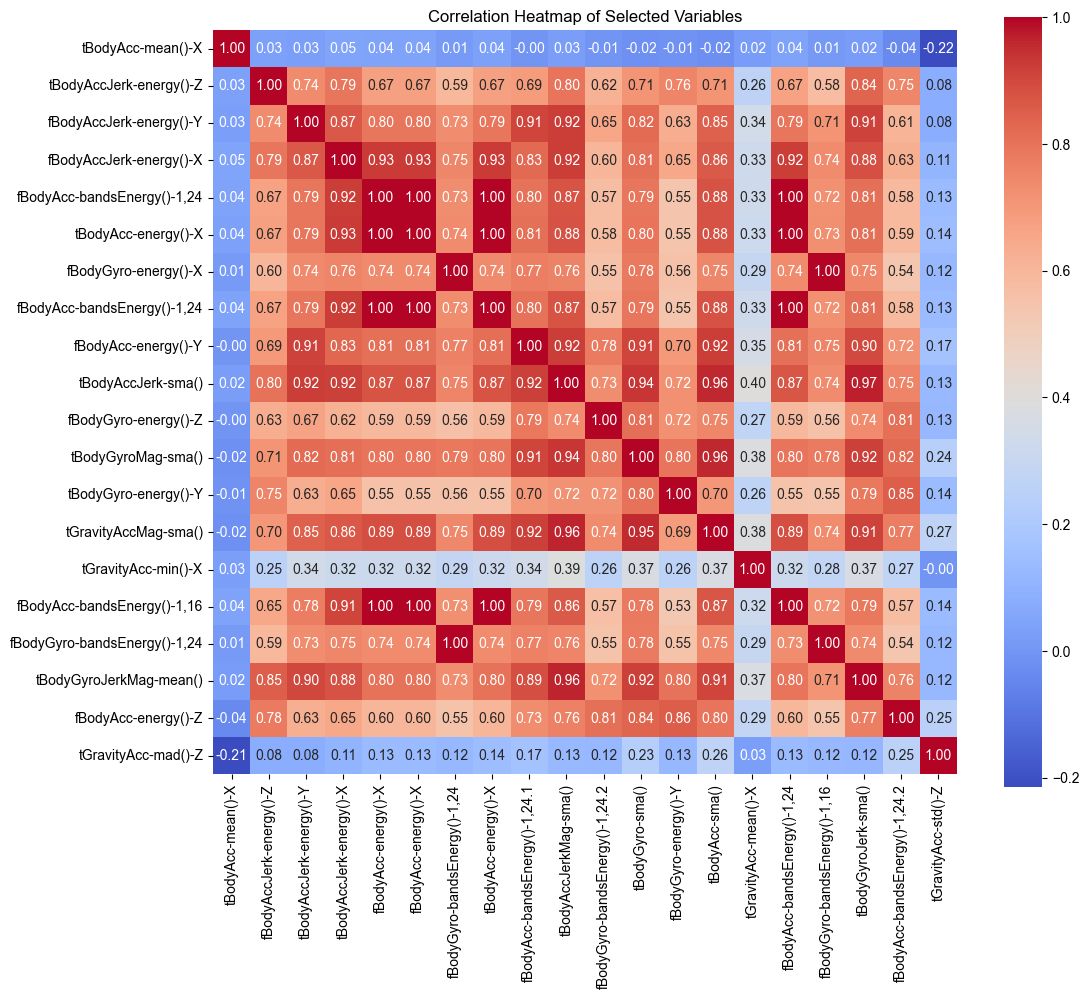

In [13]:
# 이변량 시각화 변수 줄여서
top_correlation_vars = corr.abs().unstack().sort_values(ascending=False).drop_duplicates()[:20]

# MultiIndex에서 레벨을 풀어서 단일 인덱스로 변환
top_correlation_vars_index = top_correlation_vars.reset_index().iloc[:, 0:2]

# 선택된 변수들의 상관 행렬
selected_correlation_matrix = corr.loc[top_correlation_vars_index['level_0'], top_correlation_vars_index['level_1']]

# 이변량 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Selected Variables')
plt.show()

## (2) 목표 변수 확인하기

* **세부 요구사항**
    - target인 'Activity'에 대해 단변량 분석을 수행합니다.
    - 범주의 종류, 범주별 빈도수 및 비율 등

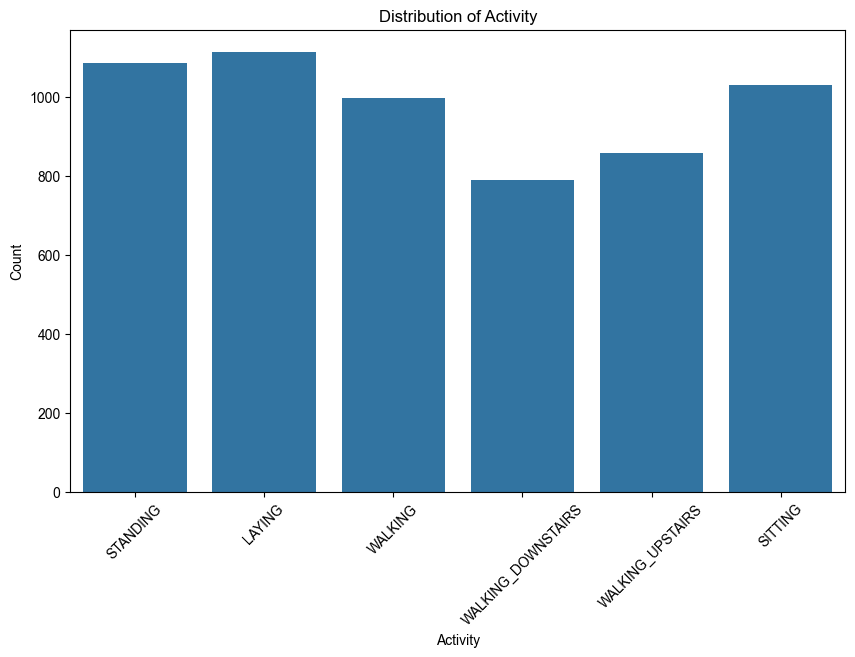

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=data)
plt.title('Distribution of Activity')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

## (3) 센서 그룹 데이터: features

* **세부 요구사항**
    - feature 이름에 대한 계층 구조별로 변수의 수를 카운트 해 봅시다.
        - sensor 별 변수의 개수
        - agg(regation) 별 변수의 개수
        - axis 별 변수의 개수

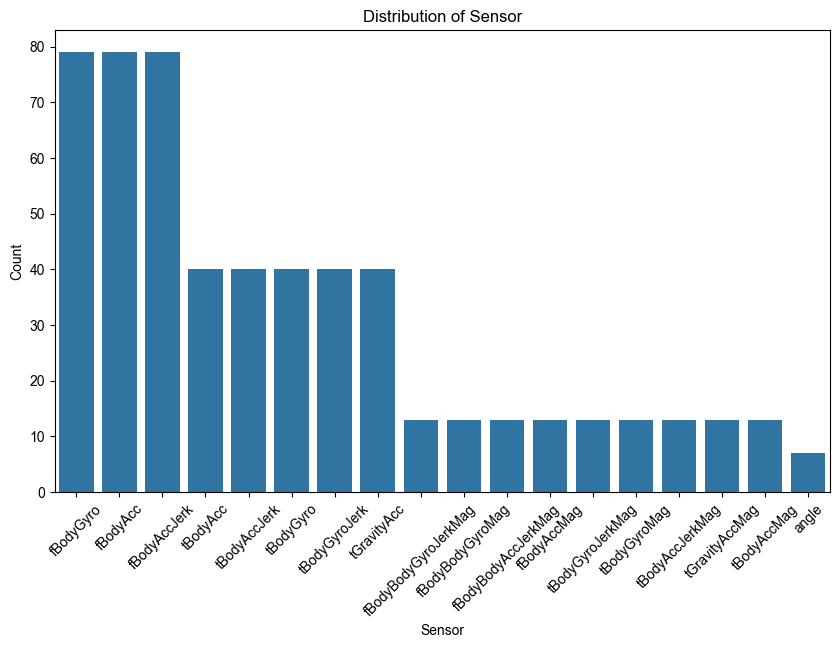

In [15]:
#센서 그룹 데이터의 'sensor'변수의 값 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='sensor', data=features, order = features['sensor'].value_counts().index)
plt.title('Distribution of Sensor')
plt.xlabel('Sensor')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

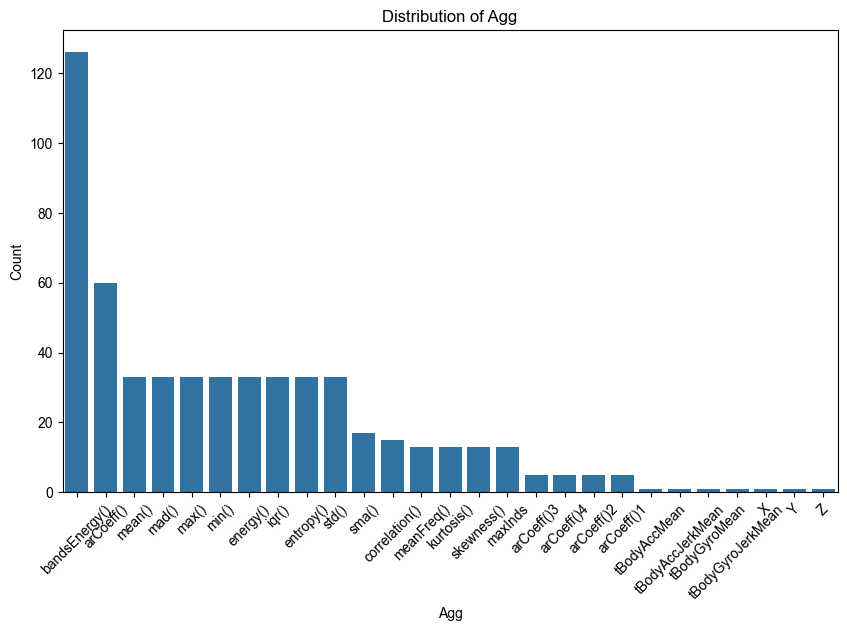

In [16]:
#센서 그룹 데이터의 'agg'변수의 값 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='agg', data=features, order = features['agg'].value_counts().index)
plt.title('Distribution of Agg')
plt.xlabel('Agg')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

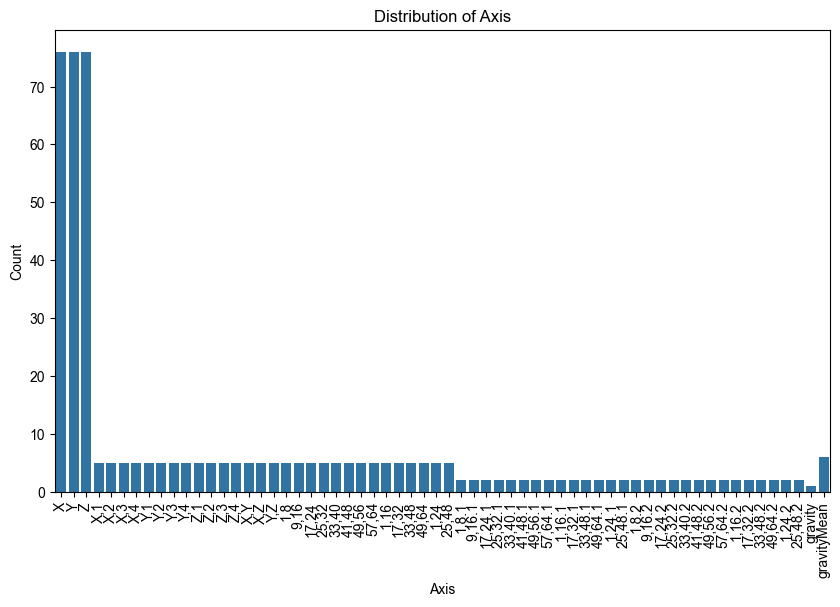

In [17]:
#센서 그룹 데이터의 'axis'변수의 값 확인
plt.figure(figsize=(10, 6))
sns.countplot(x='axis', data=features)
plt.title('Distribution of Axis')
plt.xlabel('Axis')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

## 3.데이터 분석 : 미션1

수많은 feature들을 모두 살펴보는 것은 과도한 시간과 노력이 필요합니다. 그래서 여러분은 **선택과 집중**을 해야 합니다.
* 1) **기본 모델을 생성**한 후 **변수 중요도**를 구합니다.   
    * random forest 알고리즘 사용을 권장합니다.
* 2) **중요한 feature와 중요하지 않은 feature 상위 N개를 선정**하고, 이들을 대상으로 EDA 수행.
* 3) **각 feature 그룹별 중요도**도 파악해보며 EDA를 수행  
    * Feature 이름에는 계층구조를 담고 있습니다. 그렇다 보니 feature들을 적절하게 그룹으로 묶을 수 있습니다.
    * 참고로, feature 그룹의 중요도는 개별 feature 중요도의 합으로 계산할 수 있습니다.

### (1) 기본모델링 + 변수중요도 추출

* **세부 요구사항**
    - 모델링을 위한 기본 전처리를 수행합니다.
        - 주어진 데이터에서는 x, y로 나누고 train과 validation 분할 수행
    - 트리기반 알고리즘을 이용하여 모델링을 합니다.
        - 랜덤포레스트 권장 : 랜덤포레스트는 튜닝 없이 하이퍼파리미터의 기본값로도 적절한 성능의 모델을 생성할 수 있습니다.
    - 변수 중요도 추출
        - 사용자정의함수로 생성한 plot_feature_importance 을 이용
        - 변수중요도 파악및 결과 저장

#### 1) 데이터 전처리

In [18]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Activity_num
0,0.288508,-0.009196,-0.103362,-0.988986,-0.962797,-0.967422,-0.989000,-0.962596,-0.965650,-0.929747,...,-0.042494,-0.044218,0.307873,0.072790,-0.601120,0.331298,0.165163,21,STANDING,4
1,0.265757,-0.016576,-0.098163,-0.989551,-0.994636,-0.987435,-0.990189,-0.993870,-0.987558,-0.937337,...,-0.062899,0.388459,-0.765014,0.771524,0.345205,-0.769186,-0.147944,15,LAYING,3
2,0.278709,-0.014511,-0.108717,-0.997720,-0.981088,-0.994008,-0.997934,-0.982187,-0.995017,-0.942584,...,0.000265,-0.525022,-0.891875,0.021528,-0.833564,0.202434,-0.032755,11,STANDING,4
3,0.289795,-0.035536,-0.150354,-0.231727,-0.006412,-0.338117,-0.273557,0.014245,-0.347916,0.008288,...,-0.255125,0.612804,0.747381,-0.072944,-0.695819,0.287154,0.111388,17,WALKING,0
4,0.394807,0.034098,0.091229,0.088489,-0.106636,-0.388502,-0.010469,-0.109680,-0.346372,0.584131,...,-0.044344,-0.845268,-0.974650,-0.887846,-0.705029,0.264952,0.137758,17,WALKING_DOWNSTAIRS,2


In [19]:
# 데이터 분할을 위한 전처리
target = 'Activity'
x = data.drop(target, axis = 1)
y = data.loc[:, target] # : => 모든 행 선택, target => 열 선택

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

#### 2) 모델링

In [20]:
#생성
model = RandomForestClassifier()

#학습
model.fit(x_train, y_train)
pred = model.predict(x_val)

#평가
print('accuracy :',accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9960339943342776
[[339   0   0   0   0   0]
 [  0 296   3   0   0   0]
 [  0   4 341   0   0   0]
 [  0   0   0 286   0   0]
 [  0   0   0   0 237   0]
 [  0   0   0   0   0 259]]
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       339
           SITTING       0.99      0.99      0.99       299
          STANDING       0.99      0.99      0.99       345
           WALKING       1.00      1.00      1.00       286
WALKING_DOWNSTAIRS       1.00      1.00      1.00       237
  WALKING_UPSTAIRS       1.00      1.00      1.00       259

          accuracy                           1.00      1765
         macro avg       1.00      1.00      1.00      1765
      weighted avg       1.00      1.00      1.00      1765



#### 3) 변수 중요도 추출

In [21]:
# 변수 중요도 추출
r0 = plot_feature_importance(model.feature_importances_, list(x_train), True)
r0 = r0.rename(columns={'feature_importance': 'fi_all'})
r0

,feature_name,fi_all
0,Activity_num,0.085032
1,tGravityAcc-min()-X,0.048267
2,tGravityAcc-mean()-X,0.035102
3,"angle(Y,gravityMean)",0.026156
4,tGravityAcc-mean()-Y,0.024583
...,...,...
558,"fBodyAccJerk-bandsEnergy()-49,64.1",0.000048
559,fBodyBodyAccJerkMag-iqr(),0.000047
560,tBodyAccJerk-mean()-Y,0.000044
561,"fBodyAccJerk-bandsEnergy()-41,48",0.000035


### (2) 중요도 기반 feature 분석

* **세부 요구사항**
    - 상위 n, 하위 m 개의 변수를 선정
    - 선정된 변수(feature)와 target 간의 관계를 kdeplot으로 그리기

In [27]:
fi_top5 = r0.head()
fi_top5

,feature_name,fi_all
0,Activity_num,0.085032
1,tGravityAcc-min()-X,0.048267
2,tGravityAcc-mean()-X,0.035102
3,"angle(Y,gravityMean)",0.026156
4,tGravityAcc-mean()-Y,0.024583


In [43]:
fi_bottom5 = r0.tail()
fi_bottom5

,feature_name,fi_all
558,"fBodyAccJerk-bandsEnergy()-49,64.1",0.000048
559,fBodyBodyAccJerkMag-iqr(),0.000047
560,tBodyAccJerk-mean()-Y,0.000044
561,"fBodyAccJerk-bandsEnergy()-41,48",0.000035
562,tBodyGyroMag-entropy(),0.000032


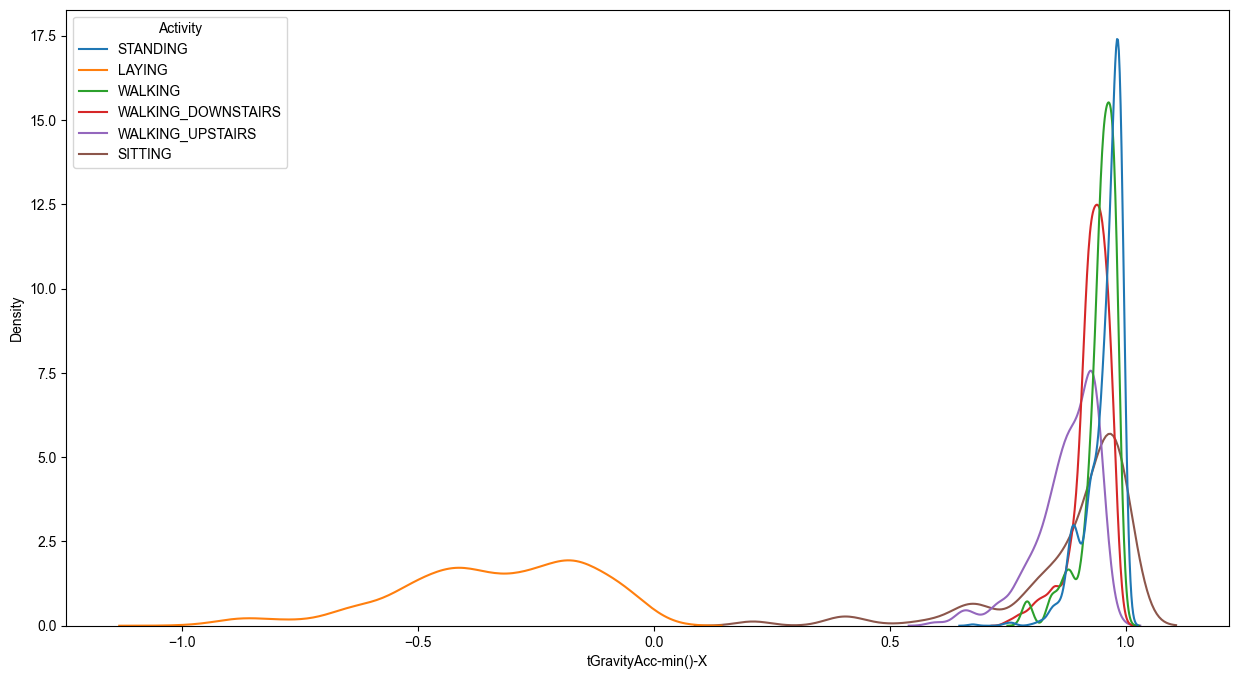

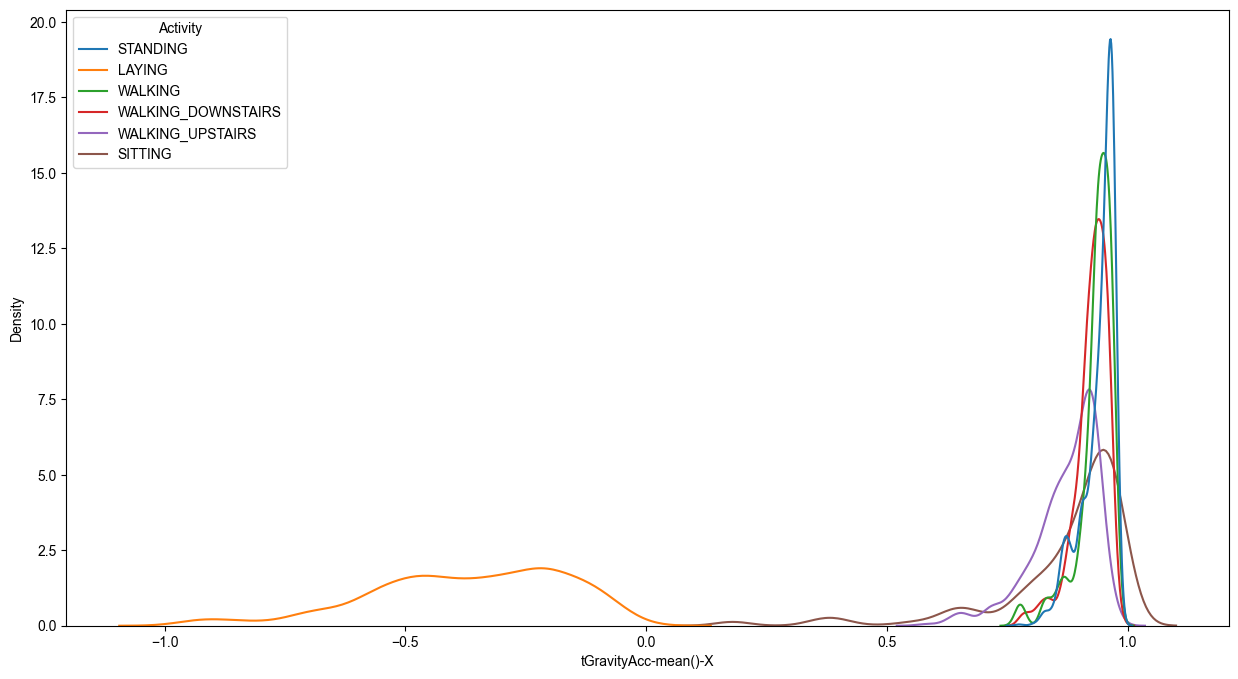

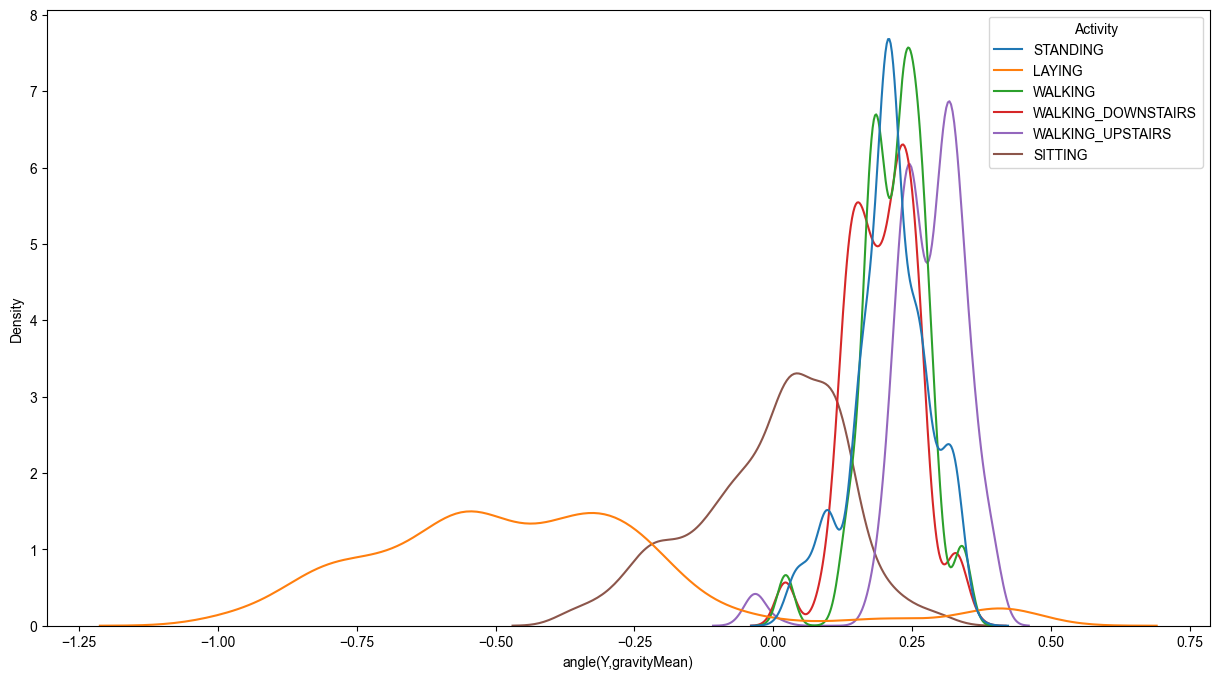

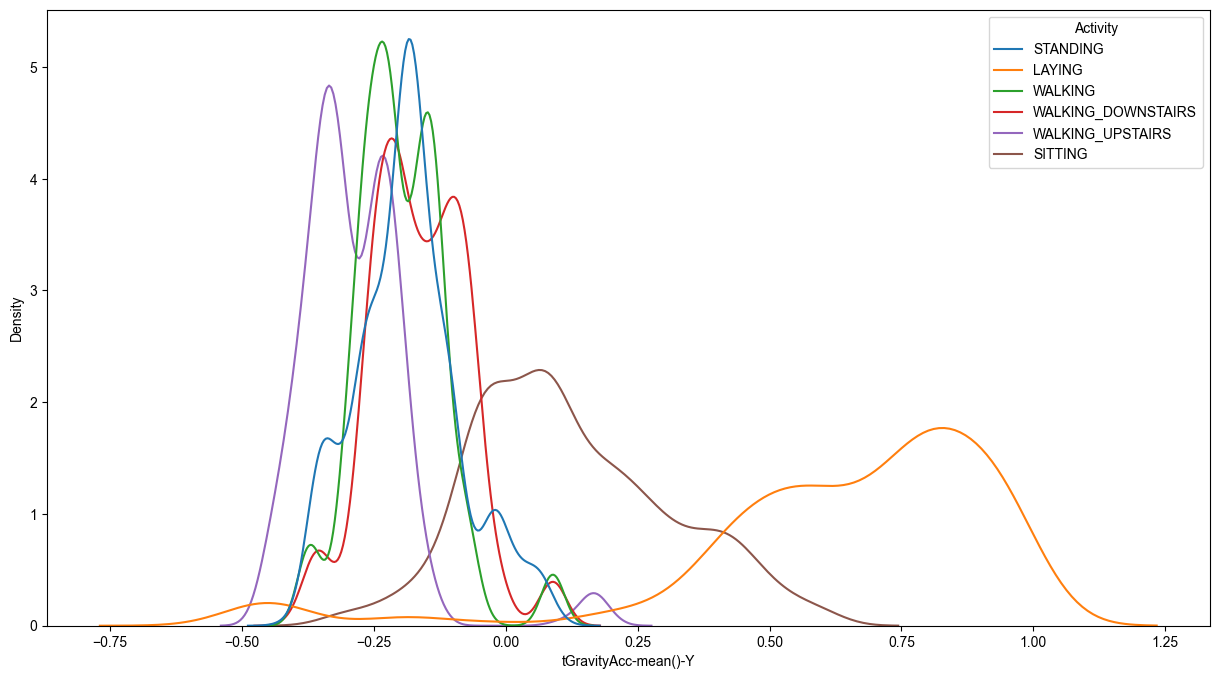

In [38]:
for i in range(1,5):
    var = fi_top5['feature_name'][i]
    plt.figure(figsize = (15,8))
    sns.kdeplot(x=var, data=data, hue=target, common_norm=False)

### (3) feature 그룹별 분석

* **세부 요구사항**
    - 제공된 features.csv 에는 feature에 대한 계층구조를 정리해 놓았습니다.
    - features와 변수중요도 결과를 merge 하시오.
    - sensor 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.
    - sensor + agg 별 중요도 합계를 구하고 상위 변수 그룹별 비교 분석을 수행 하시오.


#### 1) 결과 merge

In [44]:
merged_df = pd.merge(features, r0, on='feature_name', how='outer')
merged_df

,sensor,agg,axis,feature_name,fi_all
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000220
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000181
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000061
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.004578
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000188
...,...,...,...,...,...
586,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.2",0.000190
587,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,64.2",0.000187
588,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.1",0.000171
589,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,56.1",0.000089


#### 2) sensor 별 중요도

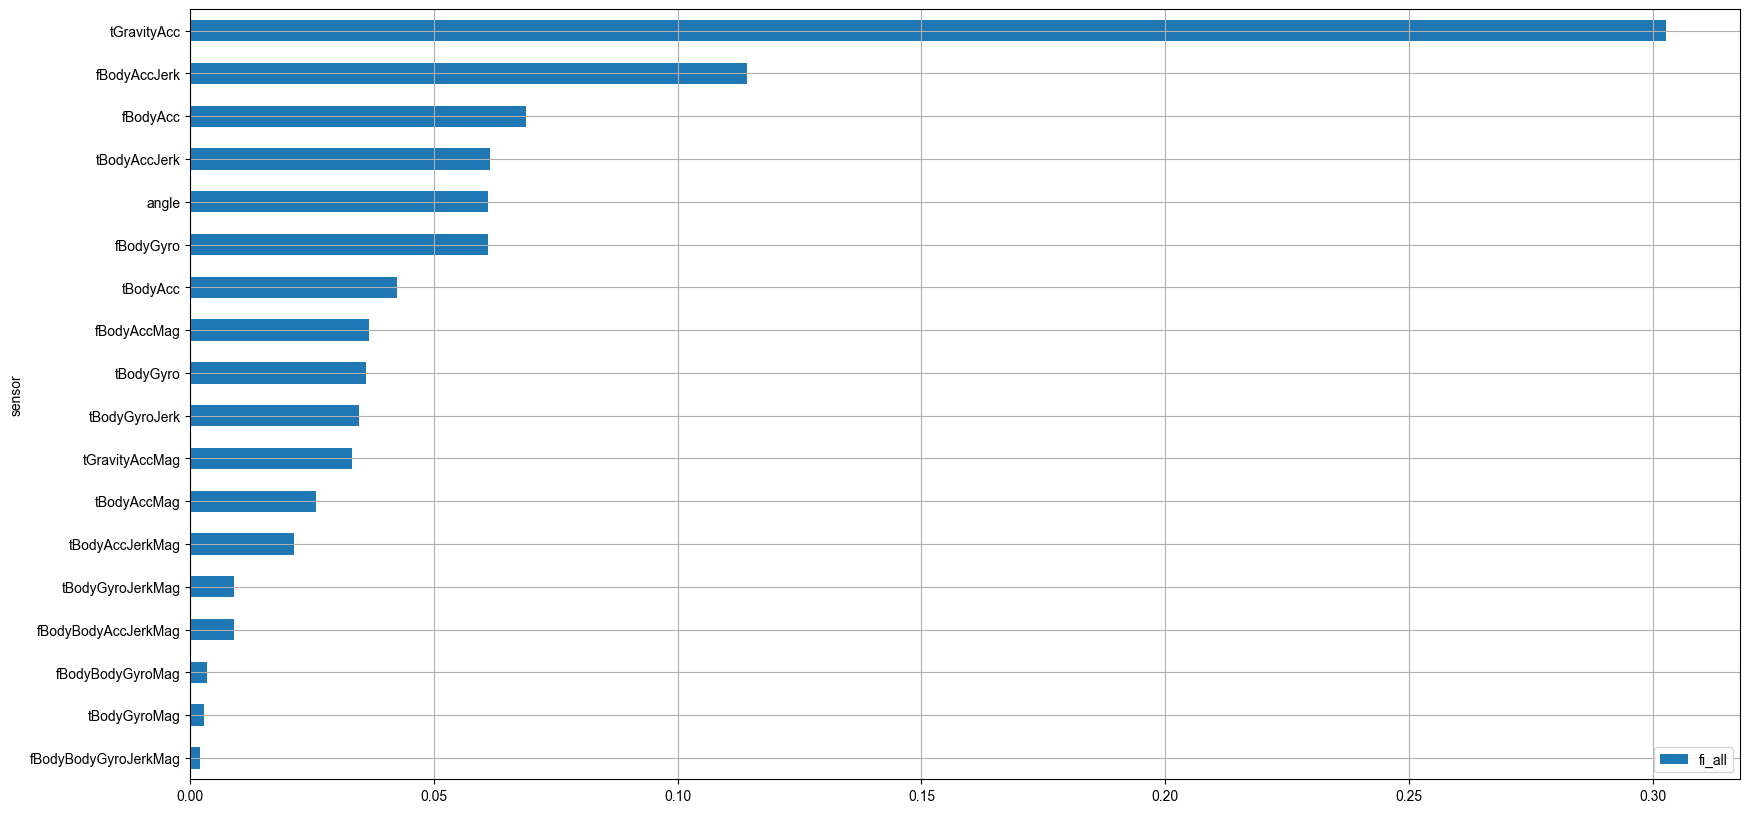

In [45]:
sensor_importance = merged_df.groupby('sensor')[['fi_all']].sum().sort_values('fi_all').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

#### 3) sensor + agg 별 중요도

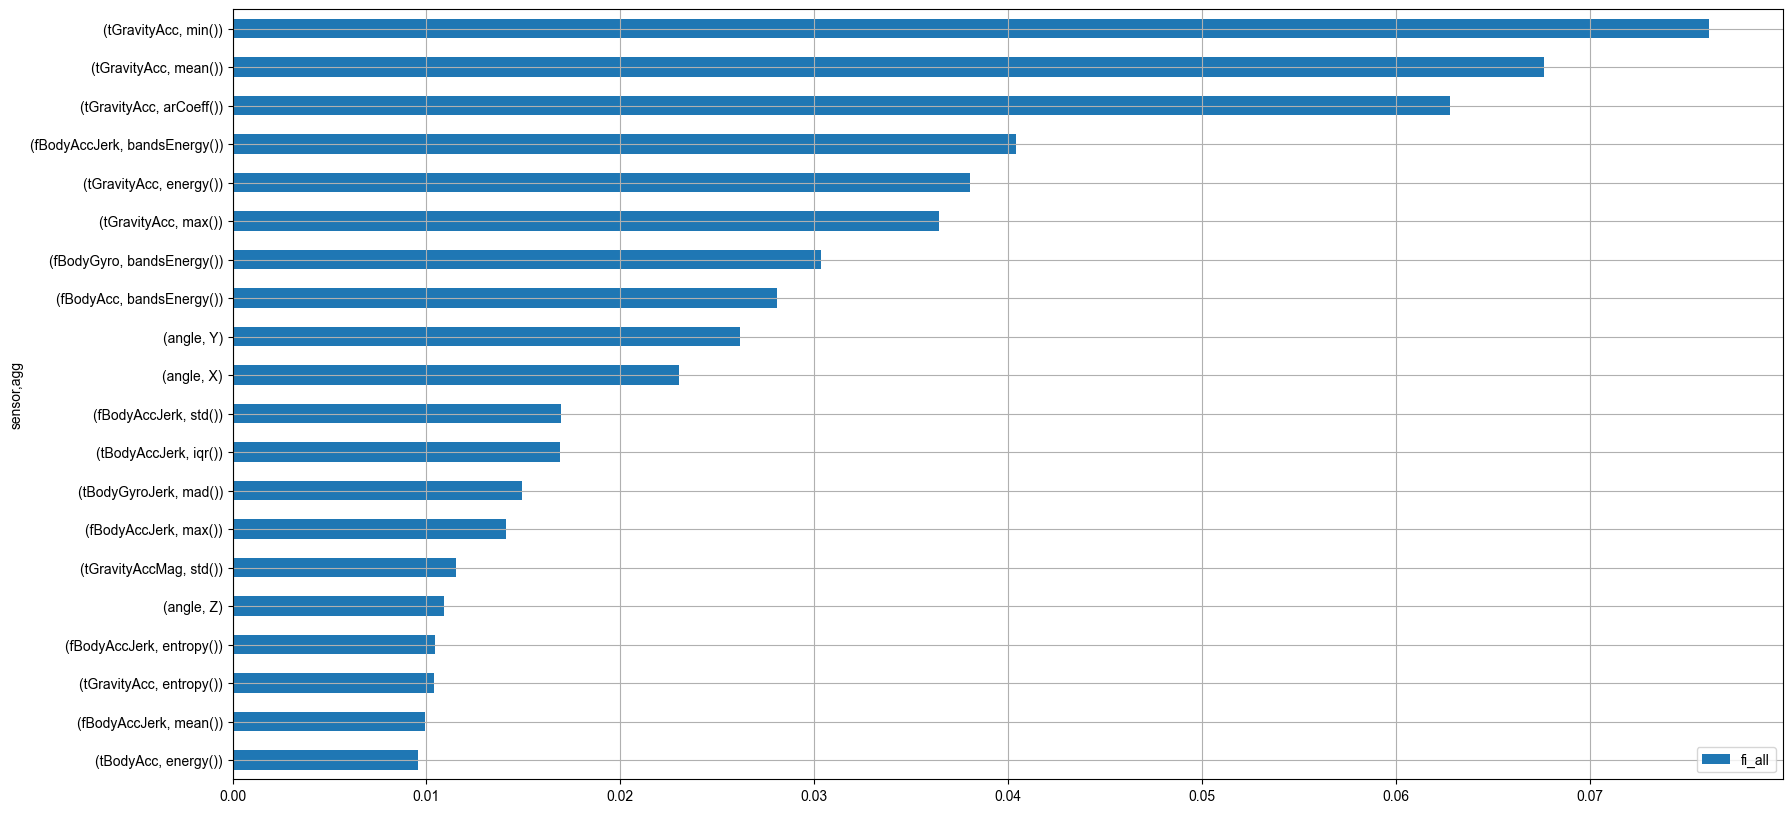

In [46]:
temp = merged_df.groupby(['sensor','agg'])[['fi_all']].sum().sort_values('fi_all')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

#### 3-1) sensor 별, agg로 나눠서 분석하기

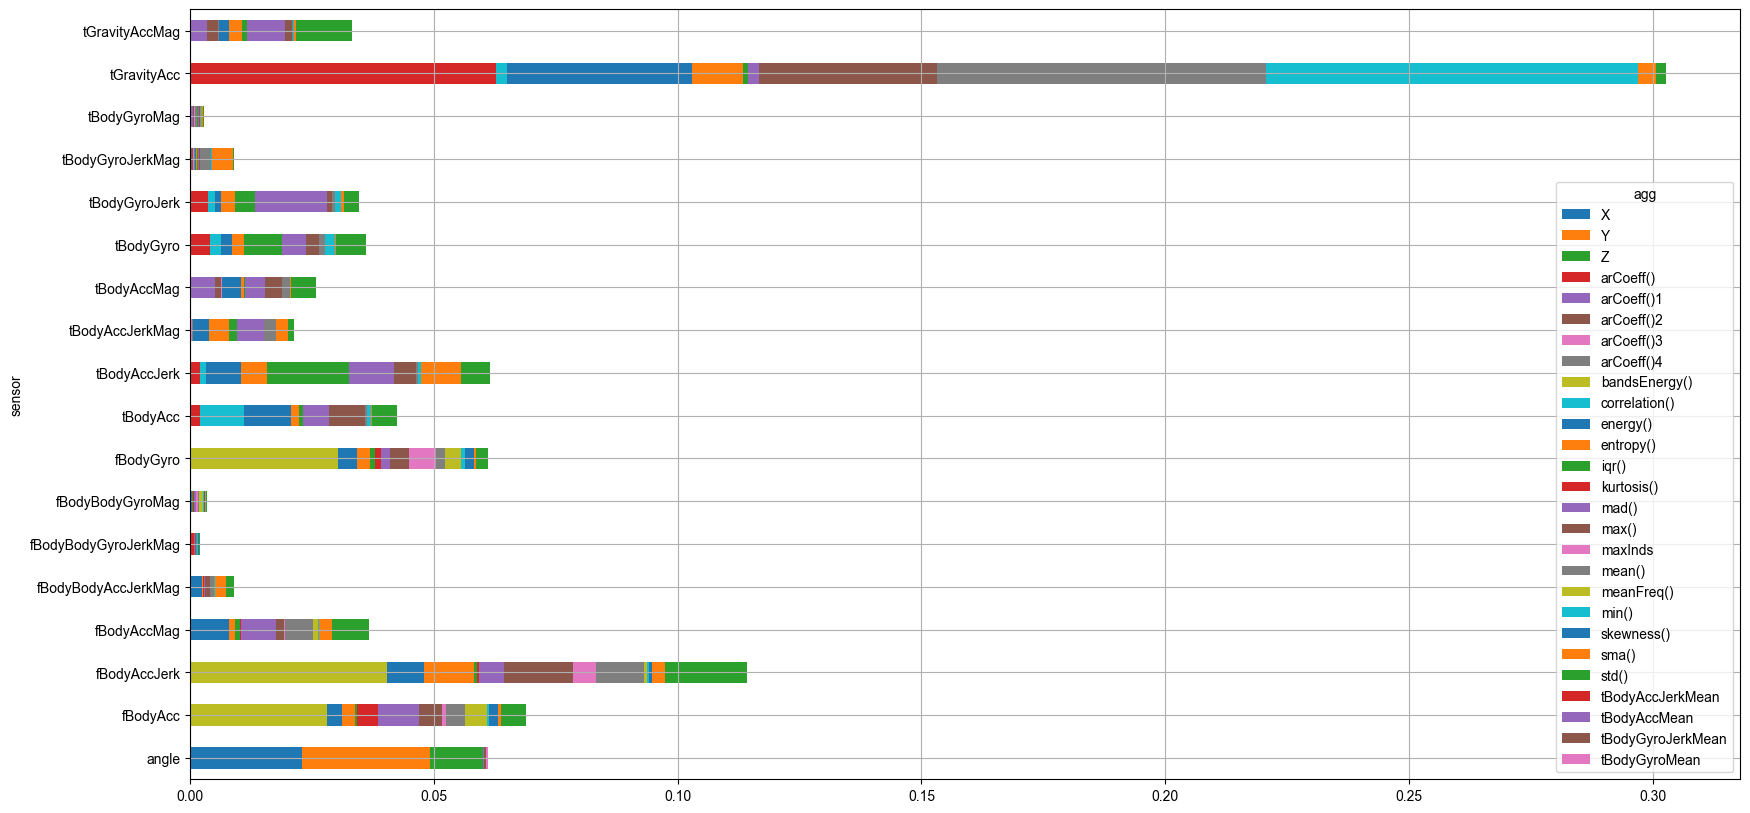

In [95]:
temp = merged_df.groupby(['sensor','agg'])['fi_all'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

## 4.데이터 분석 : 미션2

다음의 case에 맞게 feature 및 feature 그룹 중요도를 기반으로 탐색적 데이터 분석을 수행하시오.
* 1) Target을 **정적/동적 행동**으로 구분
    * 6개의 행동은 2개의 그룹(정적행동, 동적행동)으로 나뉩니다.  
    * 어떤 feature(혹은 feature 그룹)이 2개 class 그룹(정적행동, 동적행동)를 구분하는데 중요한지를 찾아보고 탐색해봅시다.
* 2) Target을 **개별 행동 여부**로 구분
    * 6가지의 행동을 분류하는 분석도 중요하지만, 개별 행동에만 특별히 영향을 받는 feature들도 있습니다.
    * 예를 들어, 계단을 오르는 행동(Walking_upstairs)과 관련이 큰 feature가 있을 것입니다. [계단을 오르는 행동]인지 아닌지로 구분하는 targe을 추가하여 EDA를 수행해 봅시다.

### (1) 정적/동적 행동으로 구분하여 분석하기

* **세부 요구사항**
    - Target인 Activity를 is_dynamic 변수로 변경하시오.
        * 값 0 : STANDING, SITTING, LAYING
        * 값 1 : WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS
    - is_dynamic을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_dynamic을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_dynamic 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_dynamic 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [48]:
is_dynamic = y.map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                   'WALKING':1, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':1})
is_dynamic

0       0
1       0
2       0
3       1
4       1
       ..
5876    0
5877    1
5878    0
5879    1
5880    0
Name: Activity, Length: 5881, dtype: int64

In [52]:
x_train, x_val, y_train, y_val = train_test_split(x, is_dynamic, test_size = .3) # test data 30%

In [53]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9994334277620397
[[963   1]
 [  0 801]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       964
           1       1.00      1.00      1.00       801

    accuracy                           1.00      1765
   macro avg       1.00      1.00      1.00      1765
weighted avg       1.00      1.00      1.00      1765



In [54]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_dynamic'})
fi.head()

,feature_name,fi_dynamic
0,tBodyAccJerk-sma(),0.059735
1,Activity_num,0.050567
2,"fBodyAccJerk-bandsEnergy()-1,16",0.050117
3,tBodyAccJerkMag-sma(),0.049892
4,tBodyAccJerkMag-mean(),0.039863


In [55]:
merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')
merged_df

,sensor,agg,axis,feature_name,fi_all,fi_dynamic
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000220,0.000059
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000181,0.000020
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000061,0.000049
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.004578,0.009922
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000188,0.000000
...,...,...,...,...,...,...
586,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.2",0.000190,0.000000
587,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,64.2",0.000187,0.000000
588,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.1",0.000171,0.000000
589,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,56.1",0.000089,0.000017


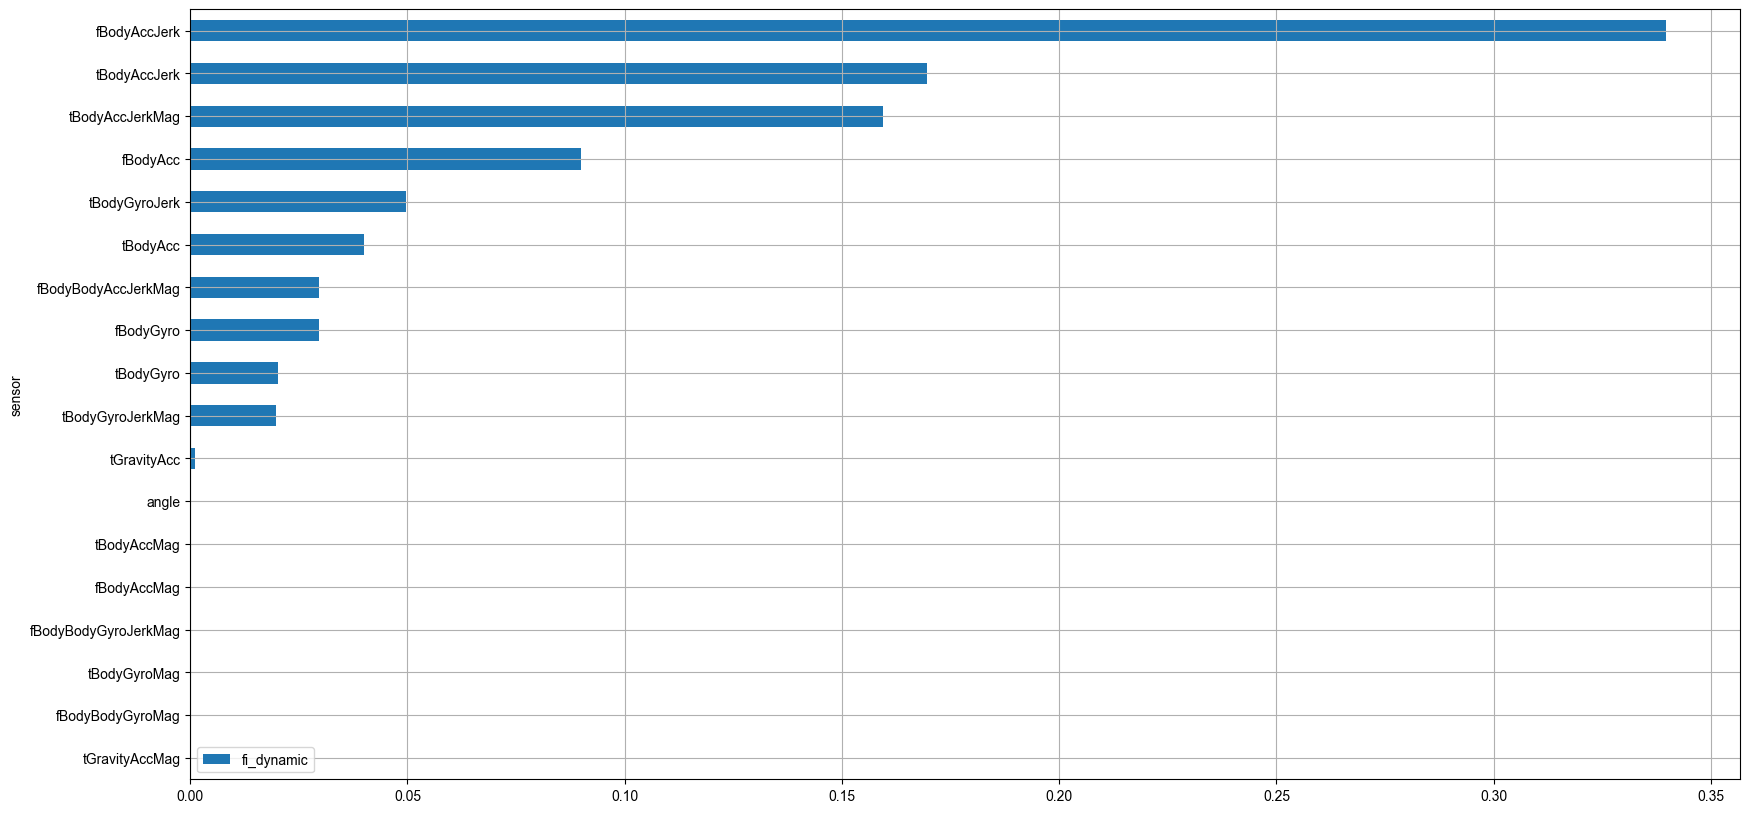

In [56]:
sensor_importance = merged_df.groupby('sensor')[['fi_dynamic']].sum().sort_values('fi_dynamic').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

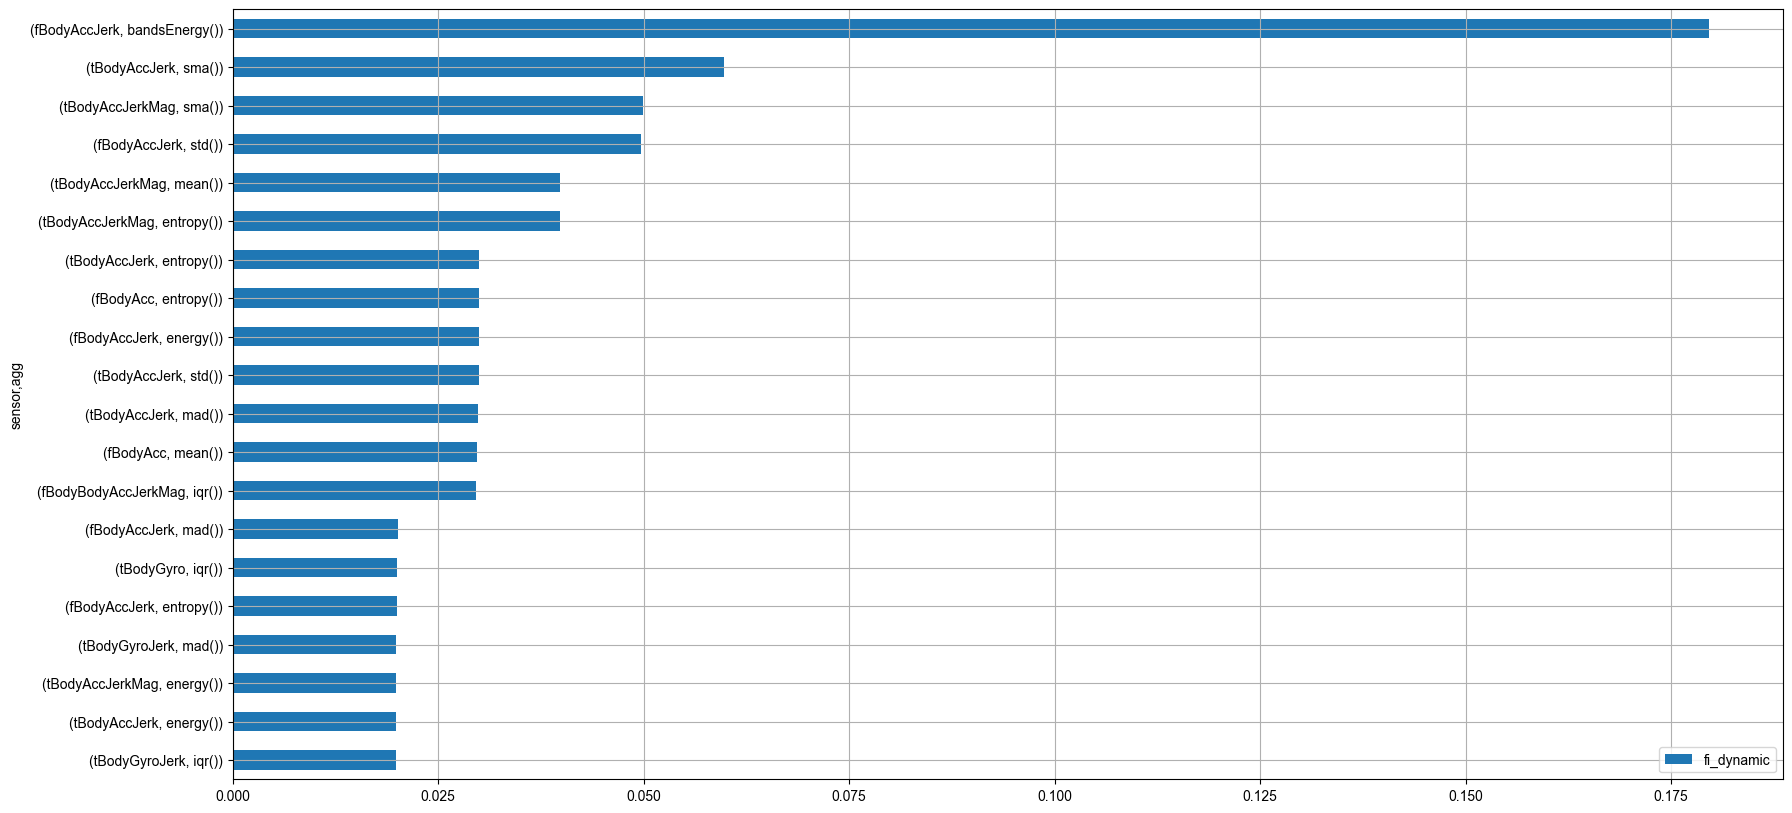

In [57]:
temp = merged_df.groupby(['sensor','agg'])[['fi_dynamic']].sum().sort_values('fi_dynamic')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

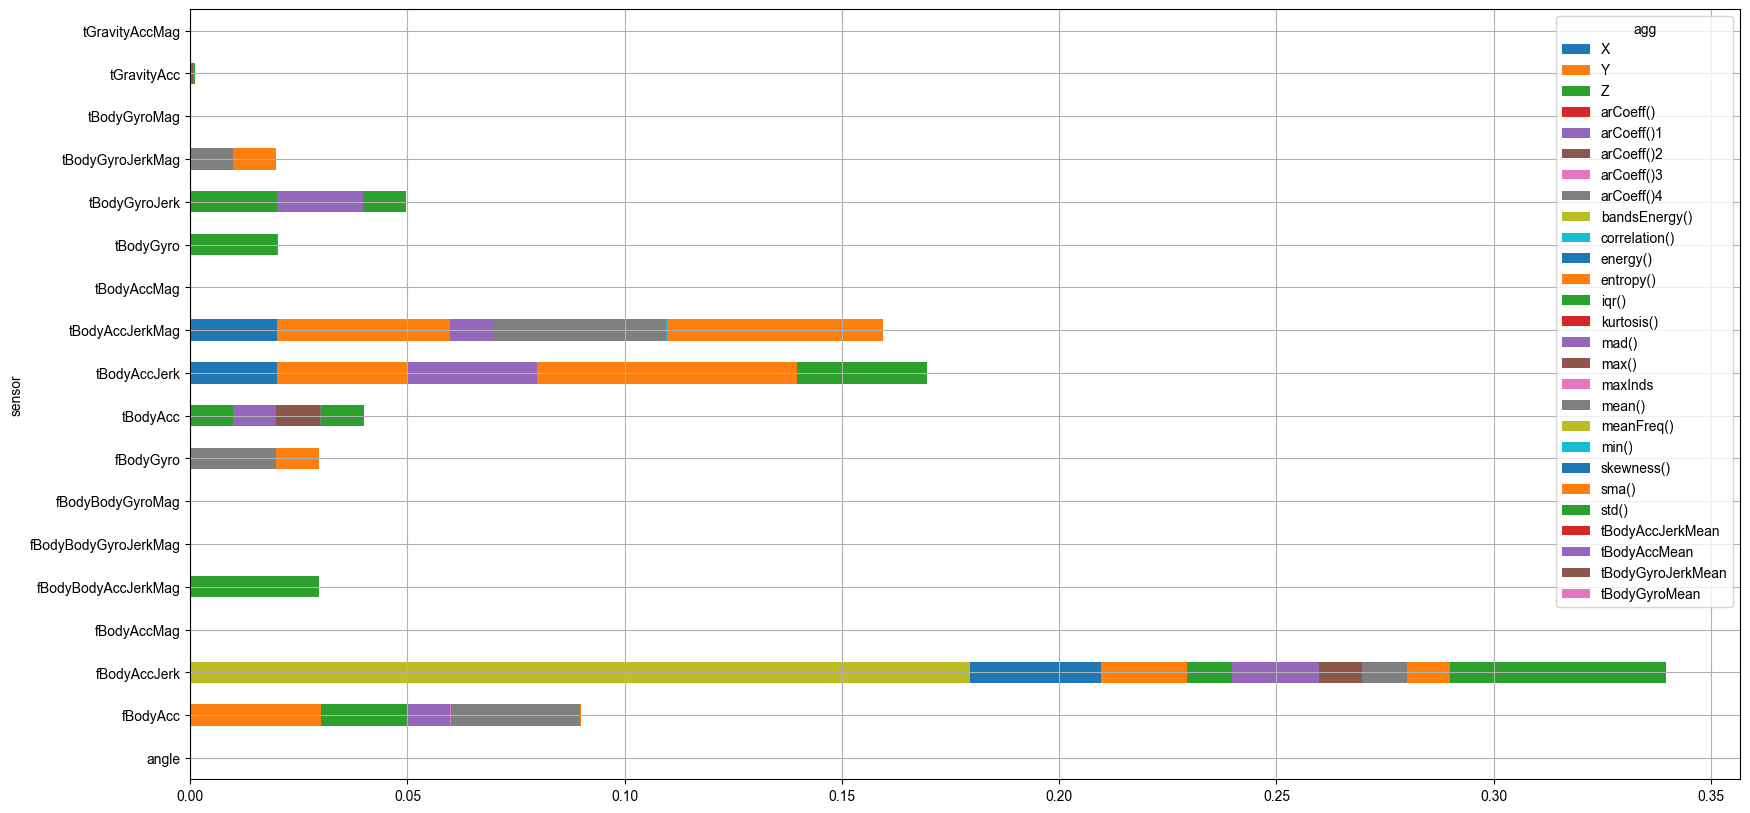

In [58]:
temp = merged_df.groupby(['sensor','agg'])['fi_dynamic'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (2) 개별 동작 분석 : is_laying

* **세부 요구사항**
    - Target인 Activity를 is_laying 변수로 변경하시오.
        * 값 1 : STANDING
        * 값 0 : 나머지
    - is_standing 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_standing 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_standing 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_standing 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


#### 1) is_laying 추가

In [59]:
is_laying = y.map({'STANDING':0, 'SITTING':0, 'LAYING':1,
                   'WALKING':0, 'WALKING_UPSTAIRS':0, 'WALKING_DOWNSTAIRS':0})
is_laying

0       0
1       1
2       0
3       0
4       0
       ..
5876    0
5877    0
5878    1
5879    0
5880    0
Name: Activity, Length: 5881, dtype: int64

#### 2) 기본모델 생성

In [60]:
x_train, x_val, y_train, y_val = train_test_split(x, is_laying, test_size = .3) # test data 30%

In [61]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 1.0
[[1443    0]
 [   0  322]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1443
           1       1.00      1.00      1.00       322

    accuracy                           1.00      1765
   macro avg       1.00      1.00      1.00      1765
weighted avg       1.00      1.00      1.00      1765



#### 3) 변수중요도 상위 5개 분석

In [62]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_laying'})
fi.head()

,feature_name,fi_laying
0,tGravityAcc-mean()-X,0.134450
1,"angle(Y,gravityMean)",0.063368
2,tGravityAcc-max()-X,0.062610
3,tGravityAcc-energy()-X,0.056464
4,tGravityAcc-min()-X,0.052373


#### 4) feature 그룹별 분석

In [63]:
merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')
merged_df

,sensor,agg,axis,feature_name,fi_all,fi_dynamic,fi_laying
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000220,0.000059,0.000107
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000181,0.000020,0.000016
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000061,0.000049,0.000018
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.004578,0.009922,0.001451
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000188,0.000000,0.000015
...,...,...,...,...,...,...,...
586,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.2",0.000190,0.000000,0.000098
587,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,64.2",0.000187,0.000000,0.000058
588,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.1",0.000171,0.000000,0.000106
589,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,56.1",0.000089,0.000017,0.000000


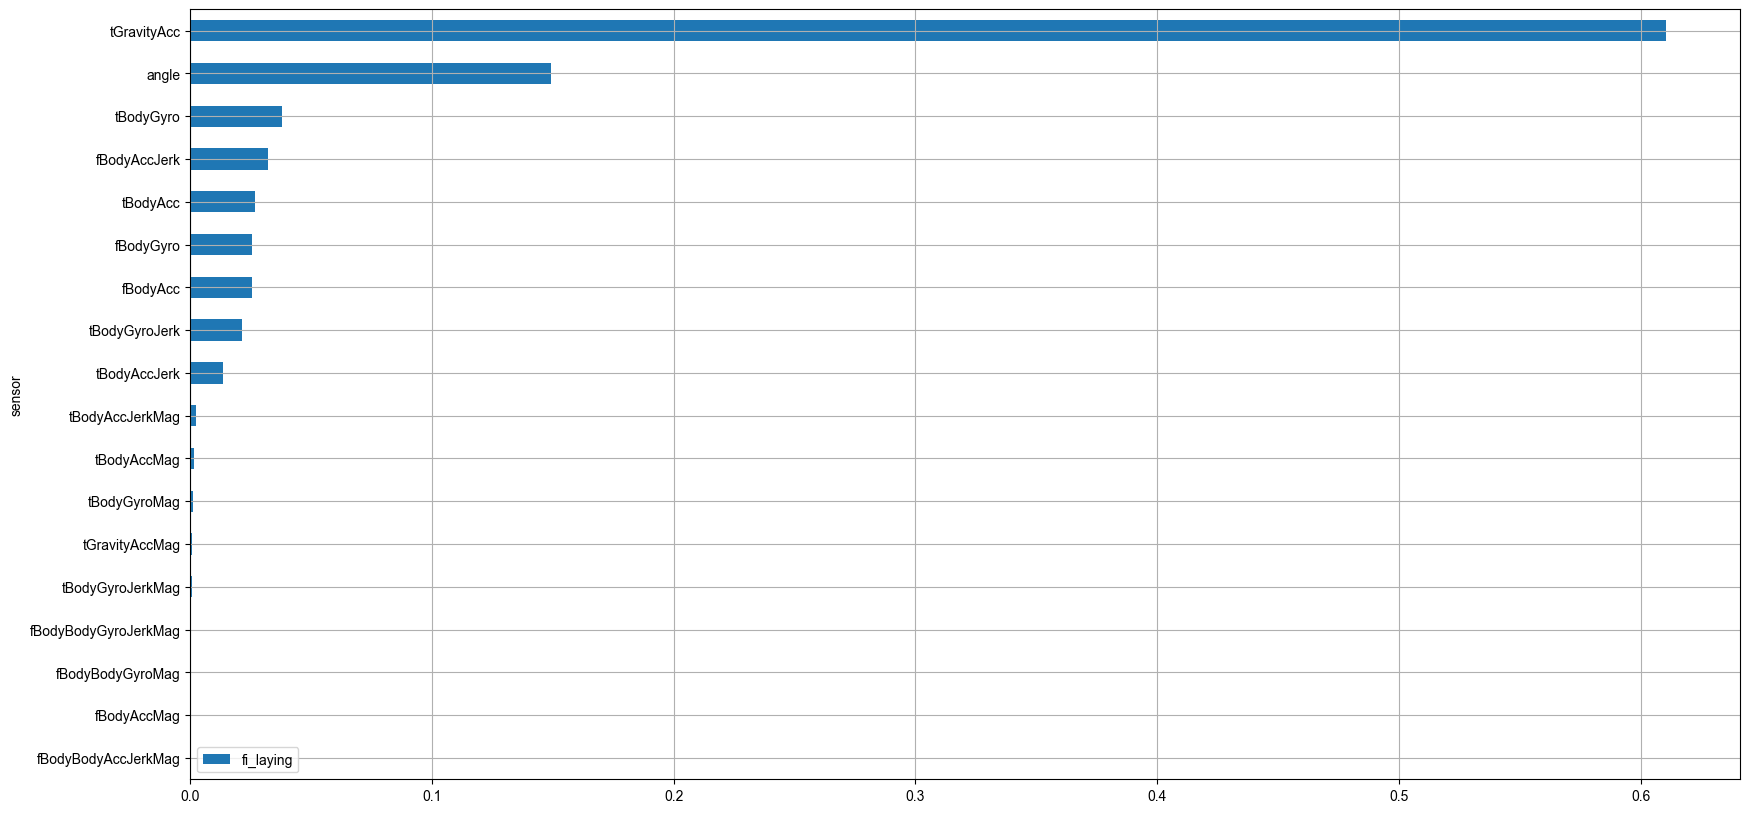

In [64]:
sensor_importance = merged_df.groupby('sensor')[['fi_laying']].sum().sort_values('fi_laying').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

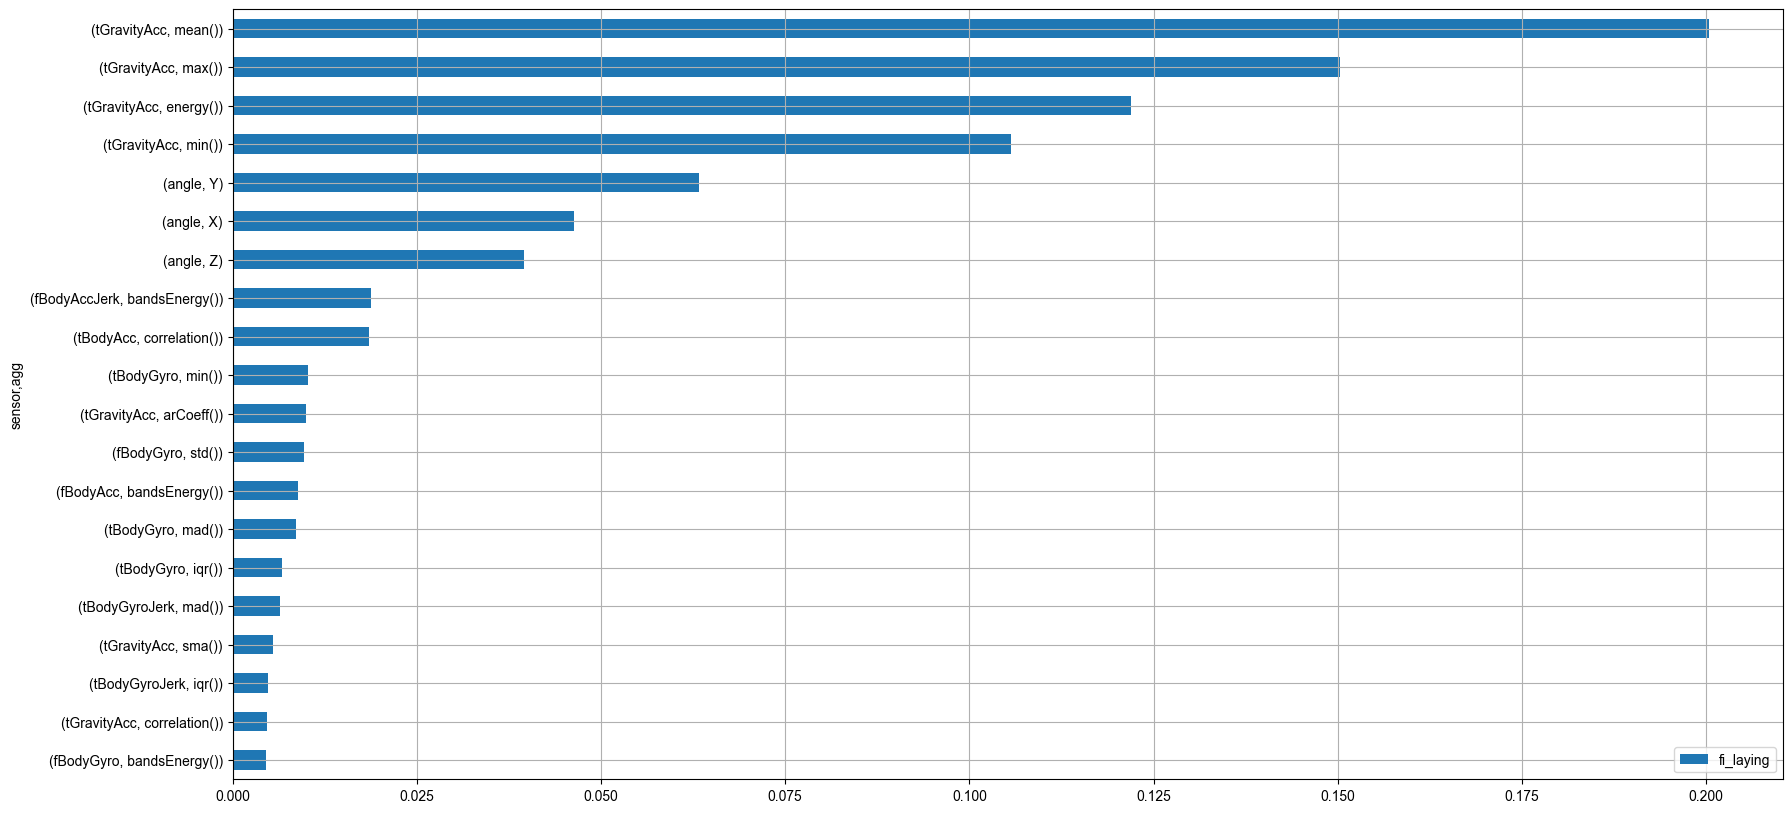

In [65]:
temp = merged_df.groupby(['sensor','agg'])[['fi_laying']].sum().sort_values('fi_laying')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

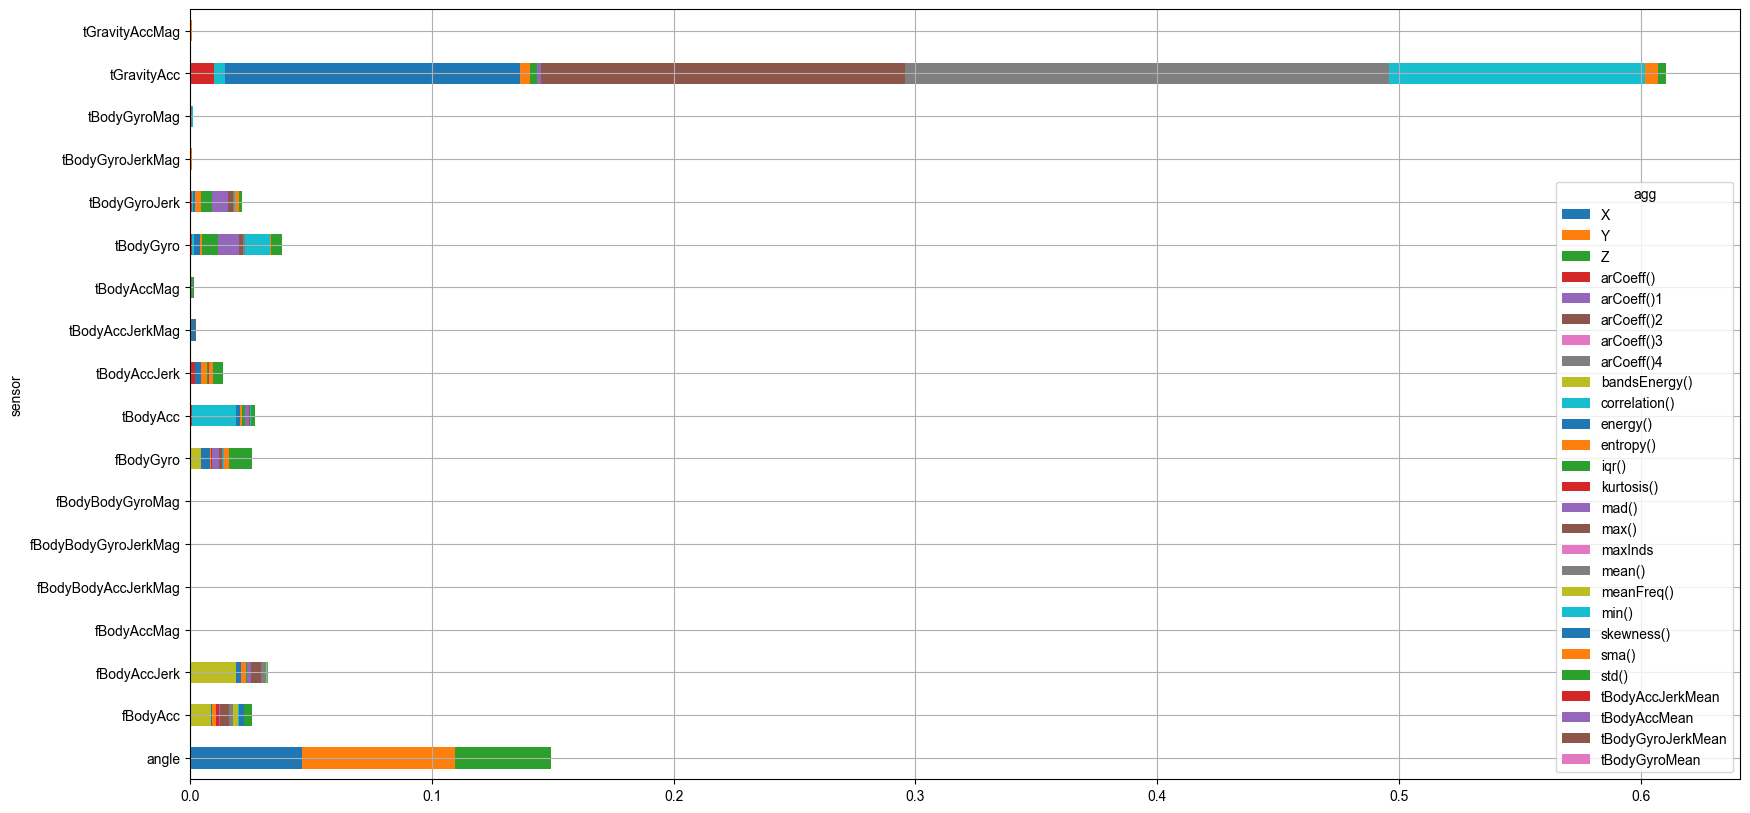

In [66]:
temp = merged_df.groupby(['sensor','agg'])['fi_laying'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (3) 개별 동작 분석 : is_standing


* **세부 요구사항**
    - Target인 Activity를 is_standing 변수로 변경하시오.
        * 값 1 : STANDING
        * 값 0 : 나머지
    - is_standing 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_standing 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_standing 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_standing 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [67]:
is_standing = y.map({'STANDING':1, 'SITTING':0, 'LAYING':0,
                   'WALKING':0, 'WALKING_UPSTAIRS':0, 'WALKING_DOWNSTAIRS':0})

x_train, x_val, y_train, y_val = train_test_split(x, is_standing, test_size = .3) # test data 30%

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9937677053824363
[[1418    4]
 [   7  336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1422
           1       0.99      0.98      0.98       343

    accuracy                           0.99      1765
   macro avg       0.99      0.99      0.99      1765
weighted avg       0.99      0.99      0.99      1765



In [68]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_standing'})

merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')

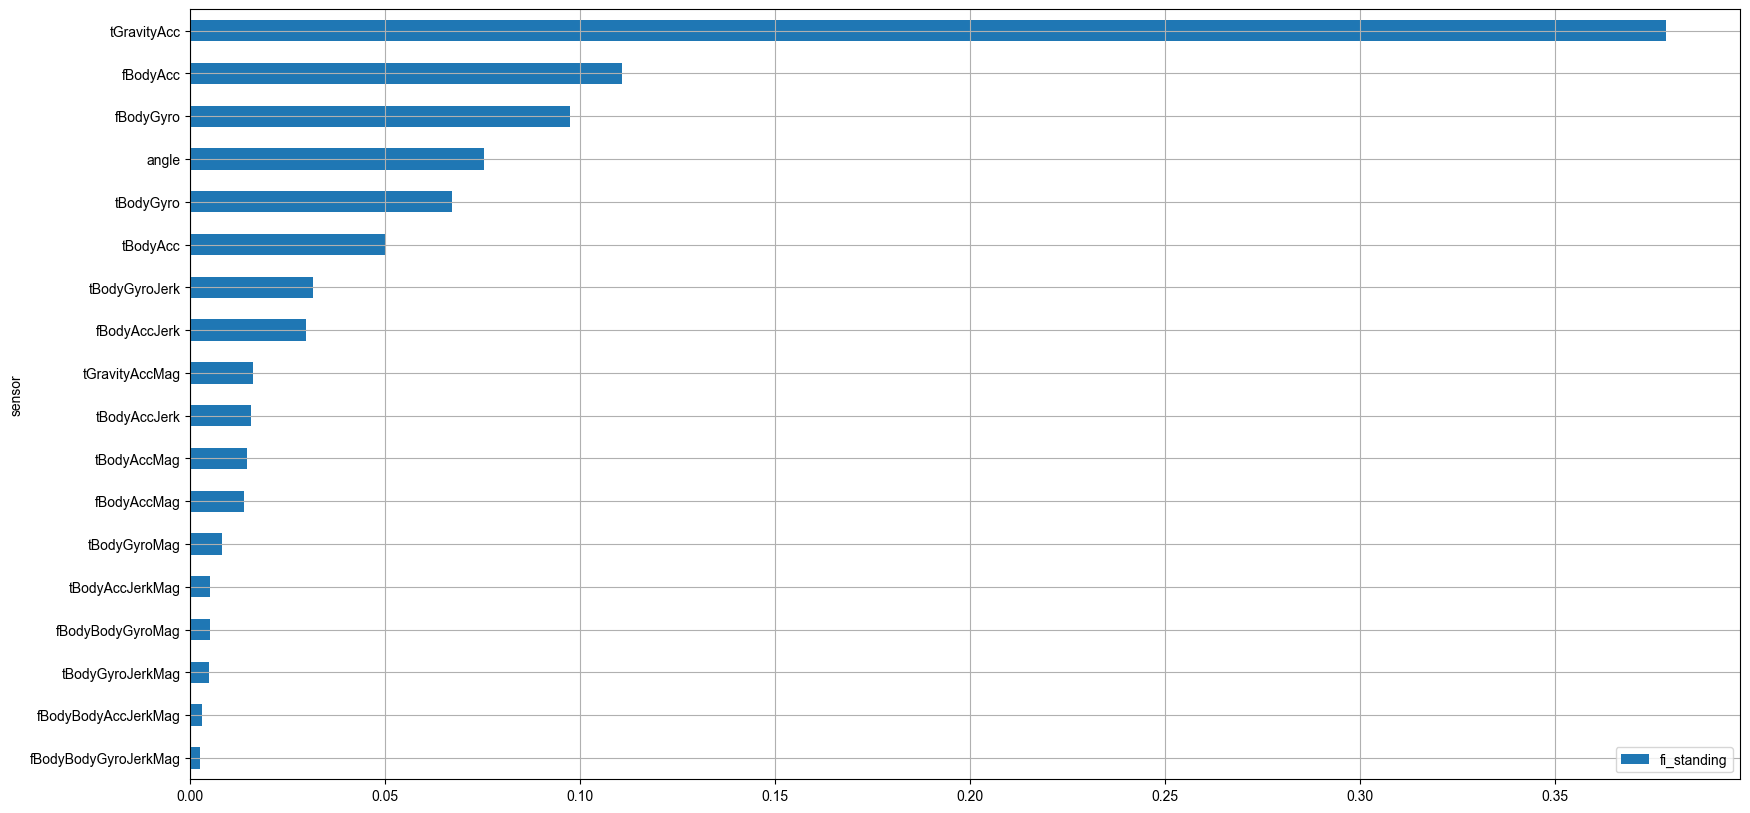

In [69]:
sensor_importance = merged_df.groupby('sensor')[['fi_standing']].sum().sort_values('fi_standing').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

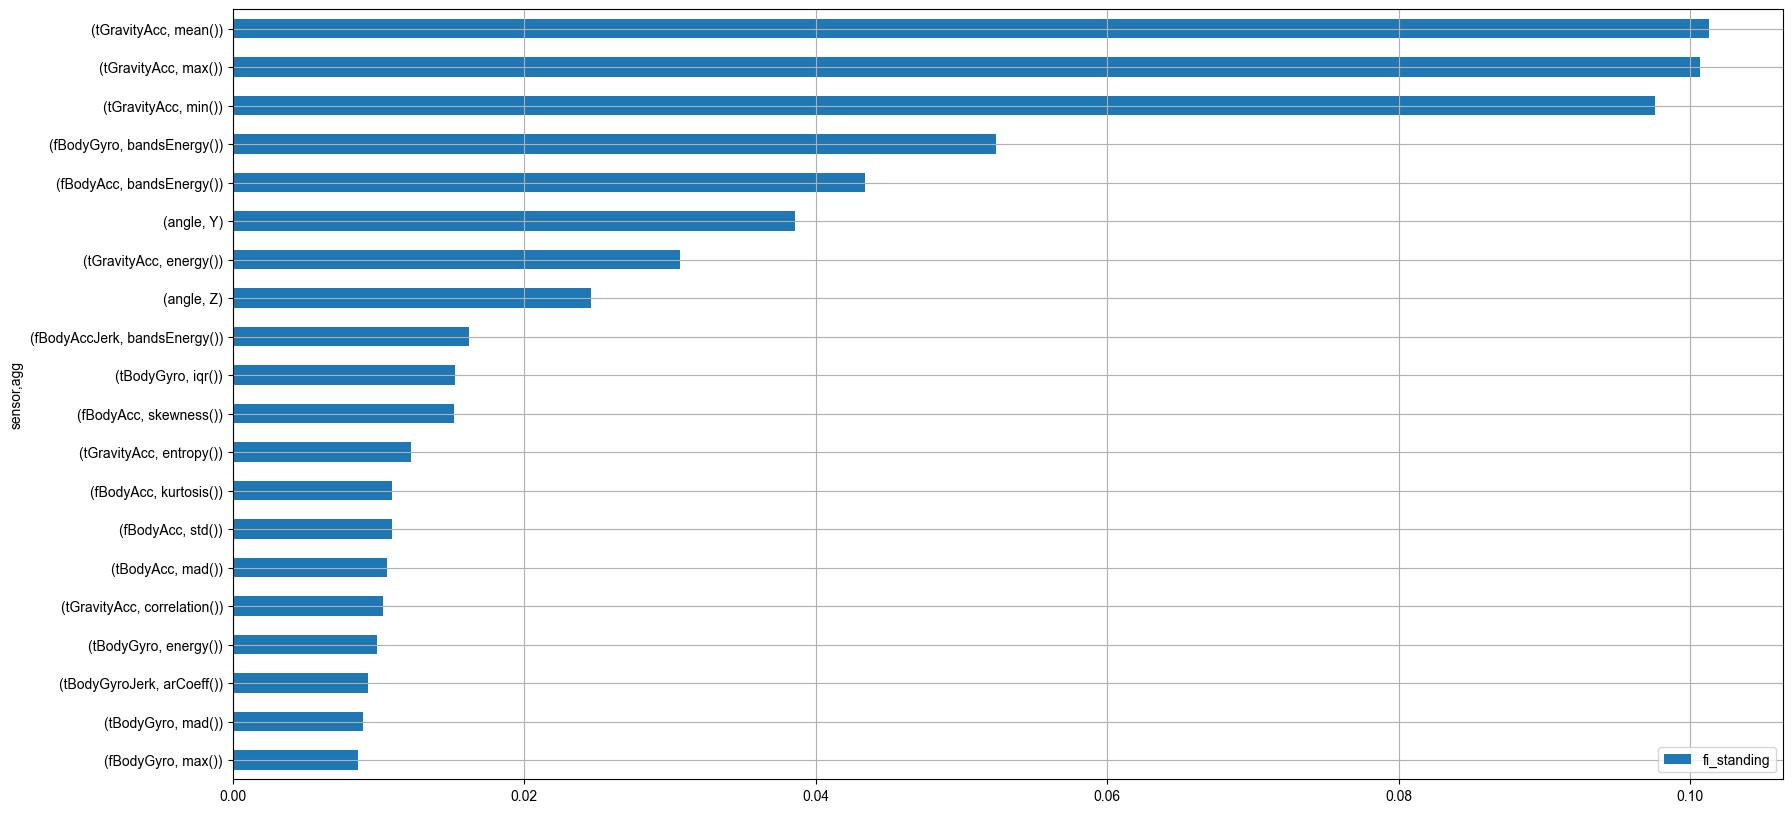

In [70]:
temp = merged_df.groupby(['sensor','agg'])[['fi_standing']].sum().sort_values('fi_standing')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

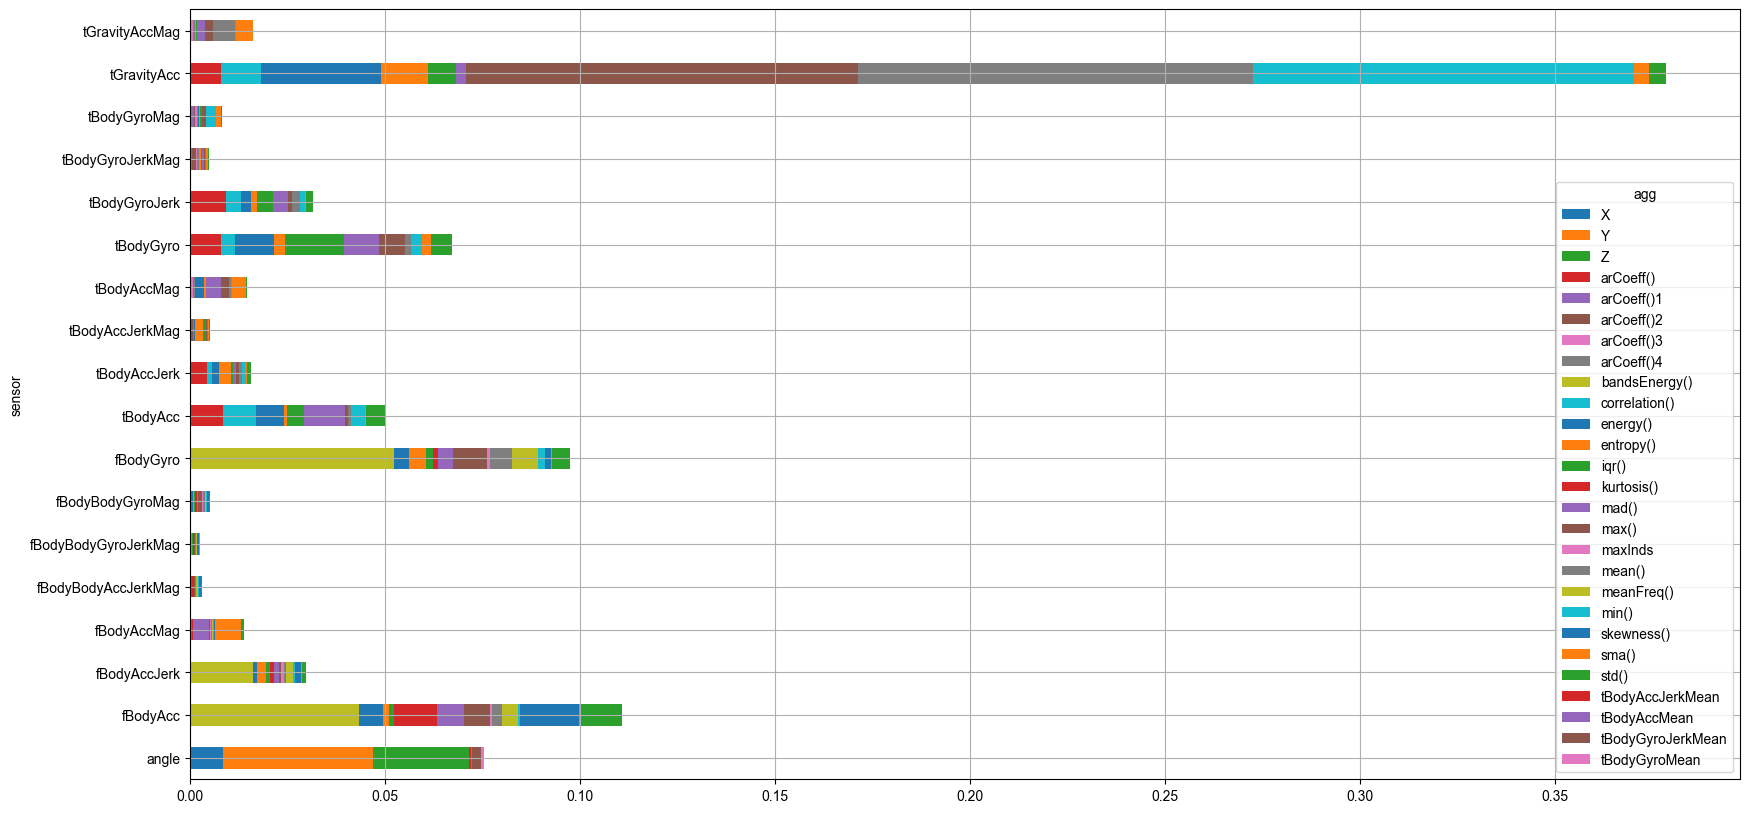

In [71]:
temp = merged_df.groupby(['sensor','agg'])['fi_standing'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (4) 개별 동작 분석 : is_sitting


* **세부 요구사항**
    - Target인 Activity를 is_sitting 변수로 변경하시오.
        * 값 1 : SITTING
        * 값 0 : 나머지
    - is_sitting 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_sitting 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_sitting 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_sitting 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [72]:
is_sitting = y.map({'STANDING':0, 'SITTING':1, 'LAYING':0,
                   'WALKING':0, 'WALKING_UPSTAIRS':0, 'WALKING_DOWNSTAIRS':0})

x_train, x_val, y_train, y_val = train_test_split(x, is_standing, test_size = .3) # test data 30%

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.998300283286119
[[1451    1]
 [   2  311]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1452
           1       1.00      0.99      1.00       313

    accuracy                           1.00      1765
   macro avg       1.00      1.00      1.00      1765
weighted avg       1.00      1.00      1.00      1765



In [73]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_sitting'})

merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')

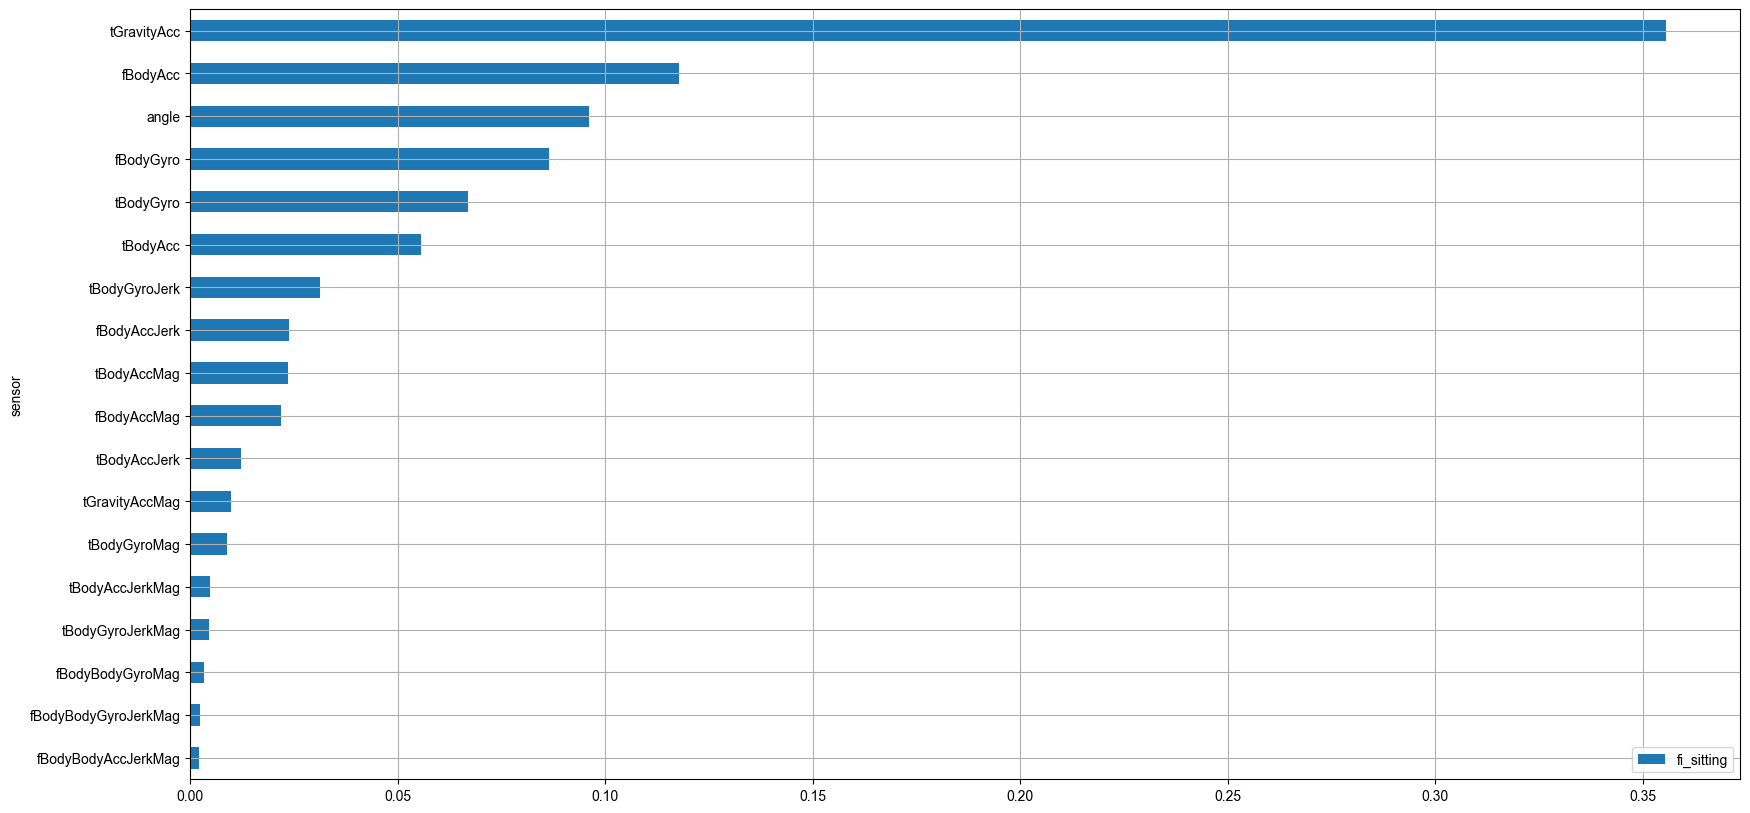

In [74]:
sensor_importance = merged_df.groupby('sensor')[['fi_sitting']].sum().sort_values('fi_sitting').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

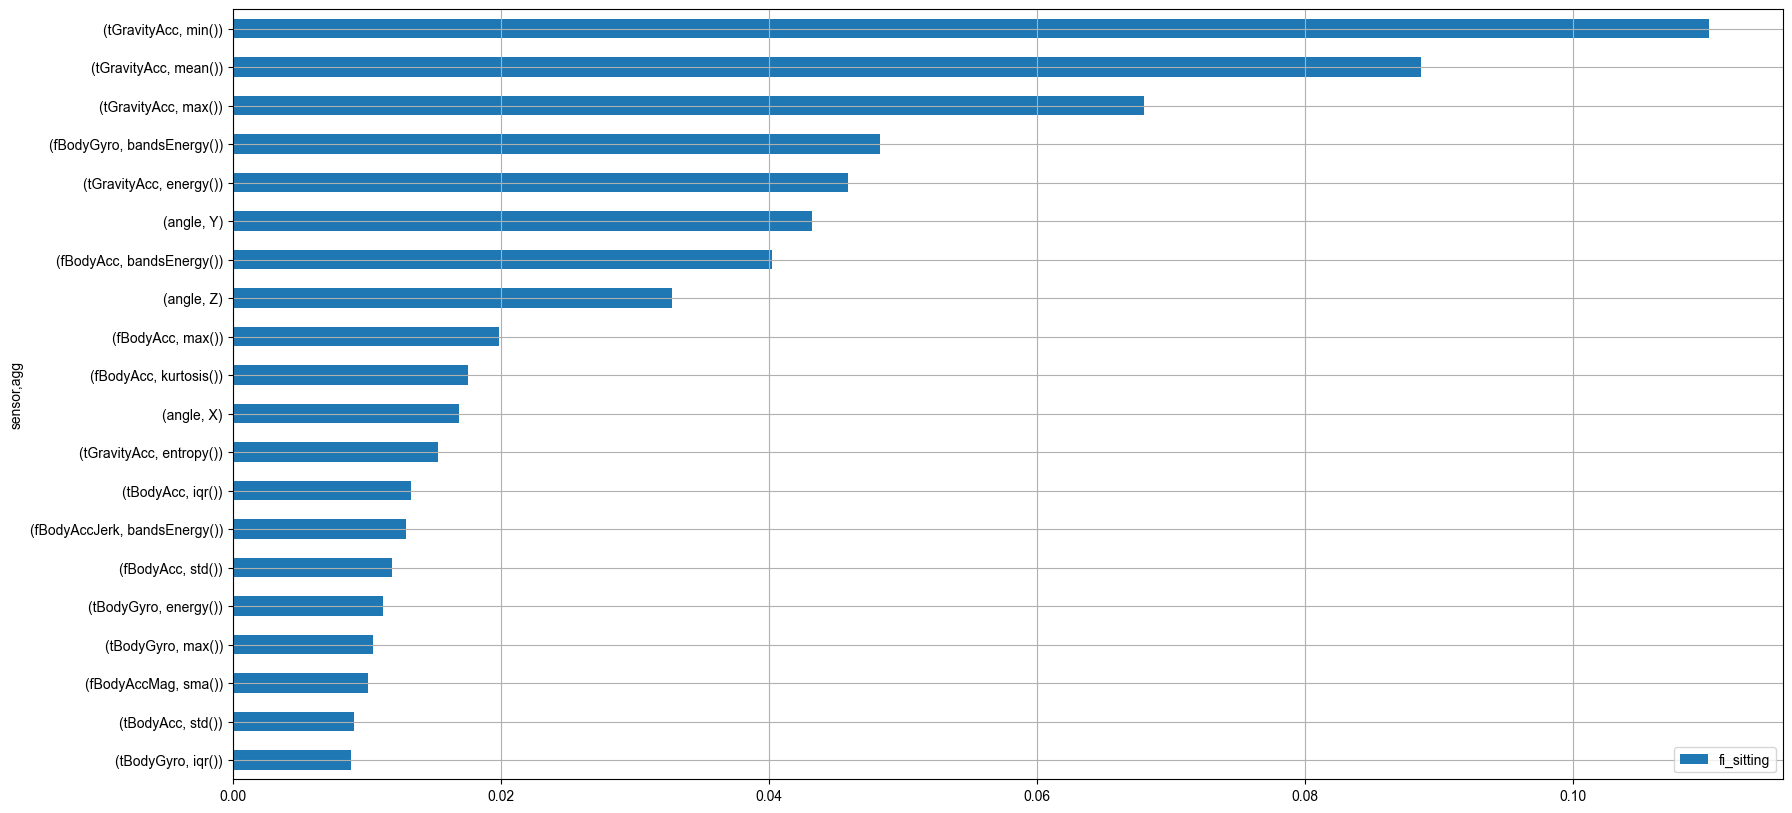

In [75]:
temp = merged_df.groupby(['sensor','agg'])[['fi_sitting']].sum().sort_values('fi_sitting')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

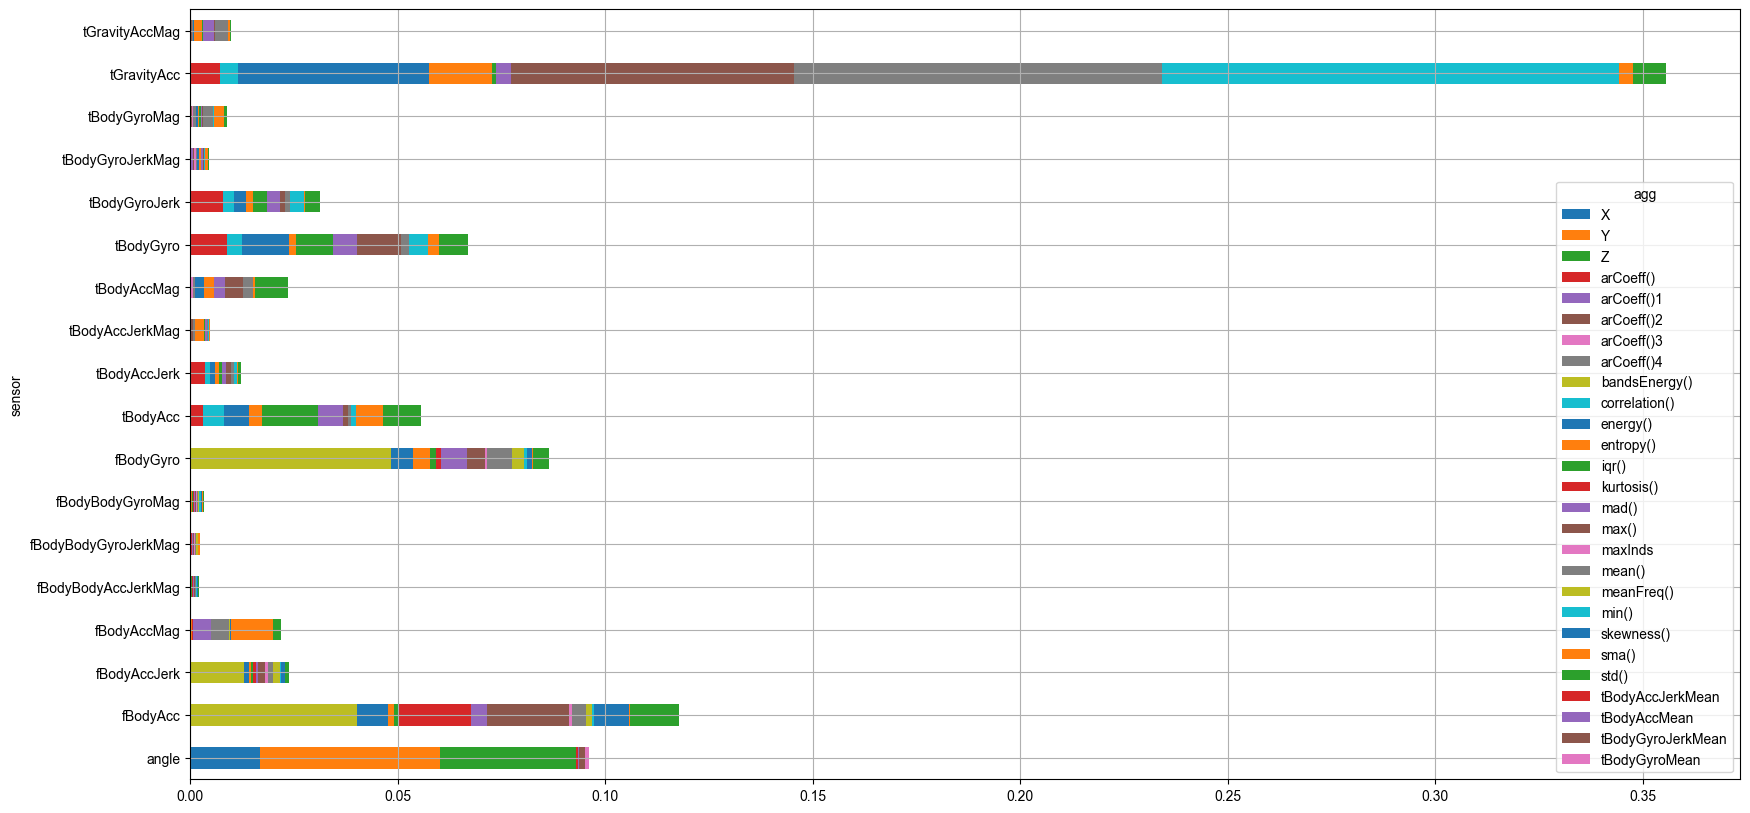

In [76]:
temp = merged_df.groupby(['sensor','agg'])['fi_sitting'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (5) 개별 동작 분석 : is_walking


* **세부 요구사항**
    - Target인 Activity를 is_walking 변수로 변경하시오.
        * 값 1 : WALKING
        * 값 0 : 나머지
    - is_walking 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [77]:
is_walking = y.map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                   'WALKING':1, 'WALKING_UPSTAIRS':0, 'WALKING_DOWNSTAIRS':0})

x_train, x_val, y_train, y_val = train_test_split(x, is_standing, test_size = .3) # test data 30%

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9909348441926346
[[1457    5]
 [  11  292]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1462
           1       0.98      0.96      0.97       303

    accuracy                           0.99      1765
   macro avg       0.99      0.98      0.98      1765
weighted avg       0.99      0.99      0.99      1765



In [78]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_walking'})

merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')

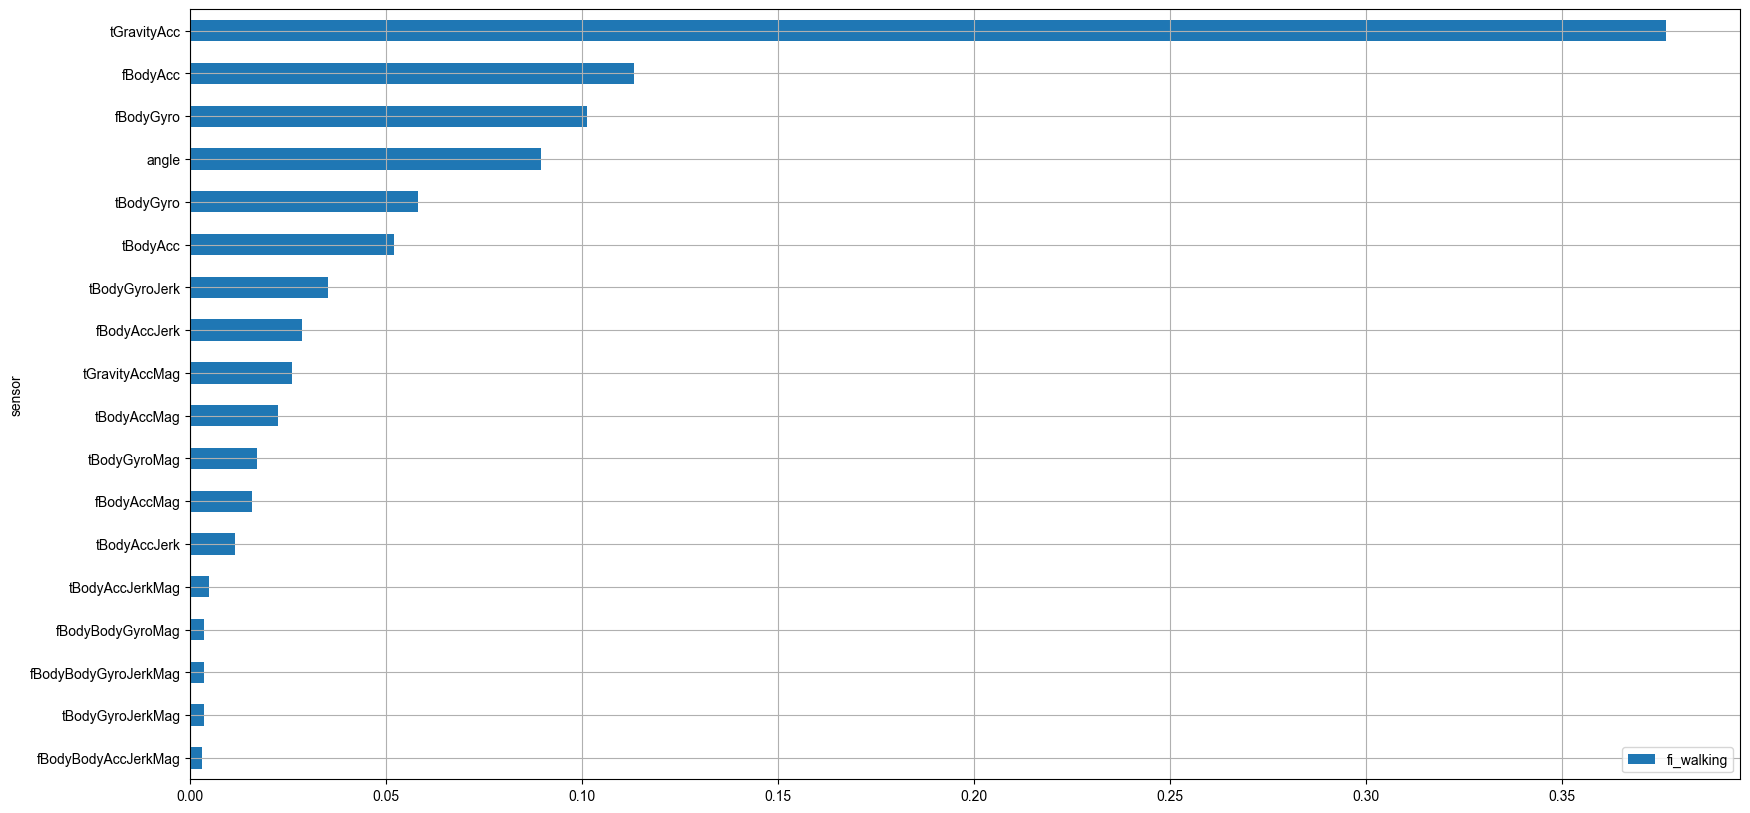

In [79]:
sensor_importance = merged_df.groupby('sensor')[['fi_walking']].sum().sort_values('fi_walking').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

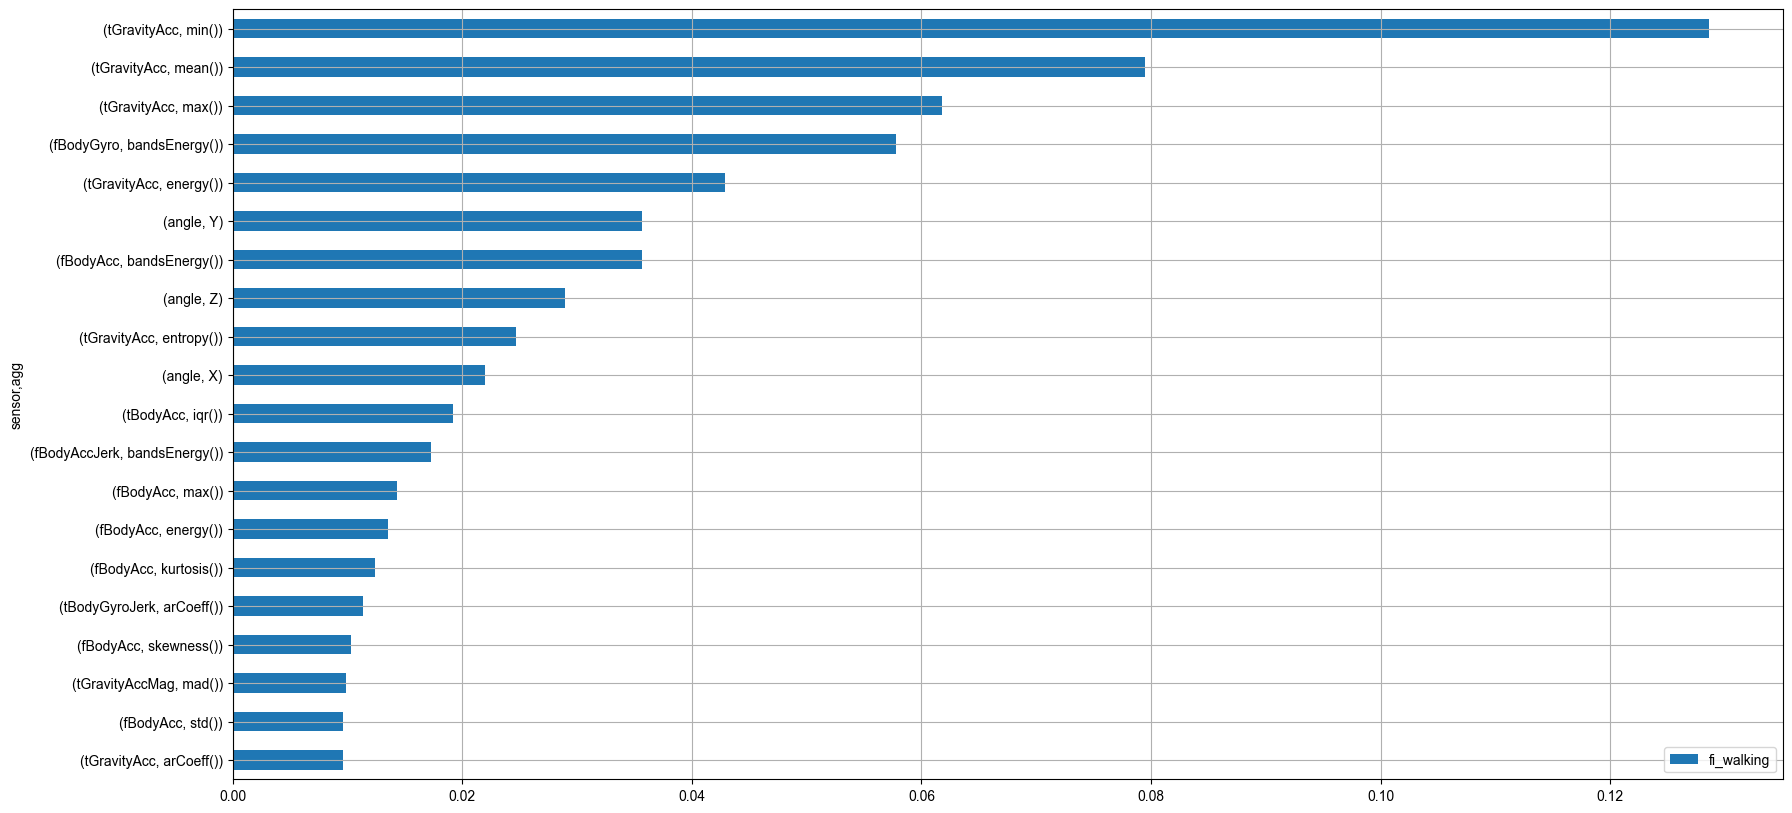

In [80]:
temp = merged_df.groupby(['sensor','agg'])[['fi_walking']].sum().sort_values('fi_walking')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

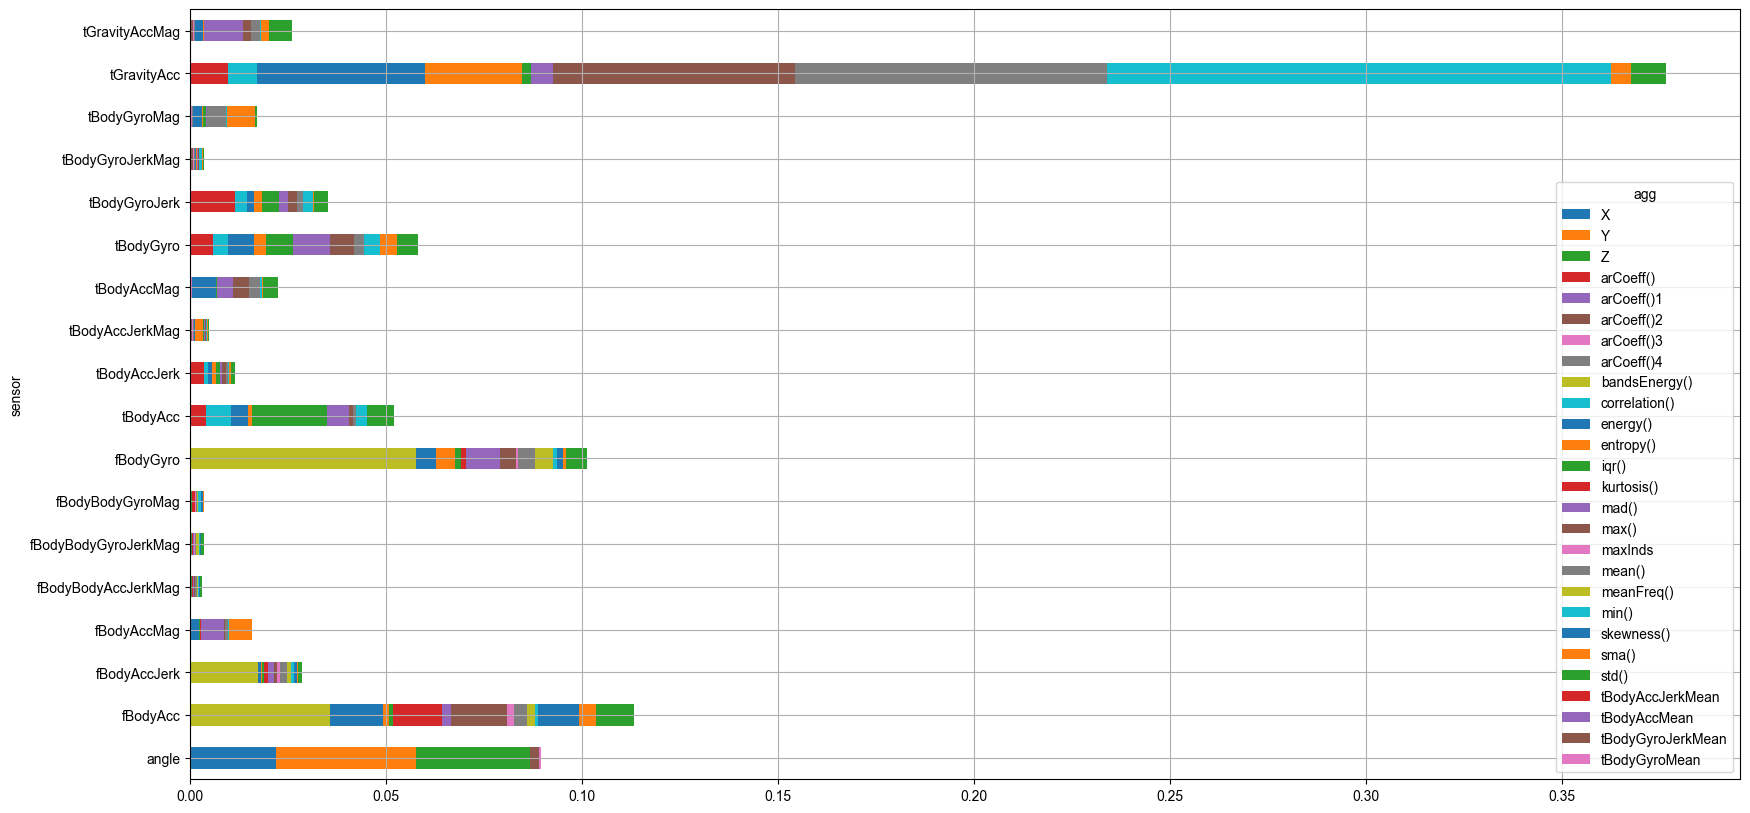

In [81]:
temp = merged_df.groupby(['sensor','agg'])['fi_walking'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (6) 개별 동작 분석 : is_walking_up


* **세부 요구사항**
    - Target인 Activity를 is_walking_up 변수로 변경하시오.
        * 값 1 : WALKING_UPSTAIRS
        * 값 0 : 나머지
    - is_walking_up 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_up 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_up 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_up 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [82]:
is_walking_up = y.map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                   'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':0})

x_train, x_val, y_train, y_val = train_test_split(x, is_standing, test_size = .3) # test data 30%

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9898016997167138
[[1439    1]
 [  17  308]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1440
           1       1.00      0.95      0.97       325

    accuracy                           0.99      1765
   macro avg       0.99      0.97      0.98      1765
weighted avg       0.99      0.99      0.99      1765



In [83]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_walking_up'})

merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')

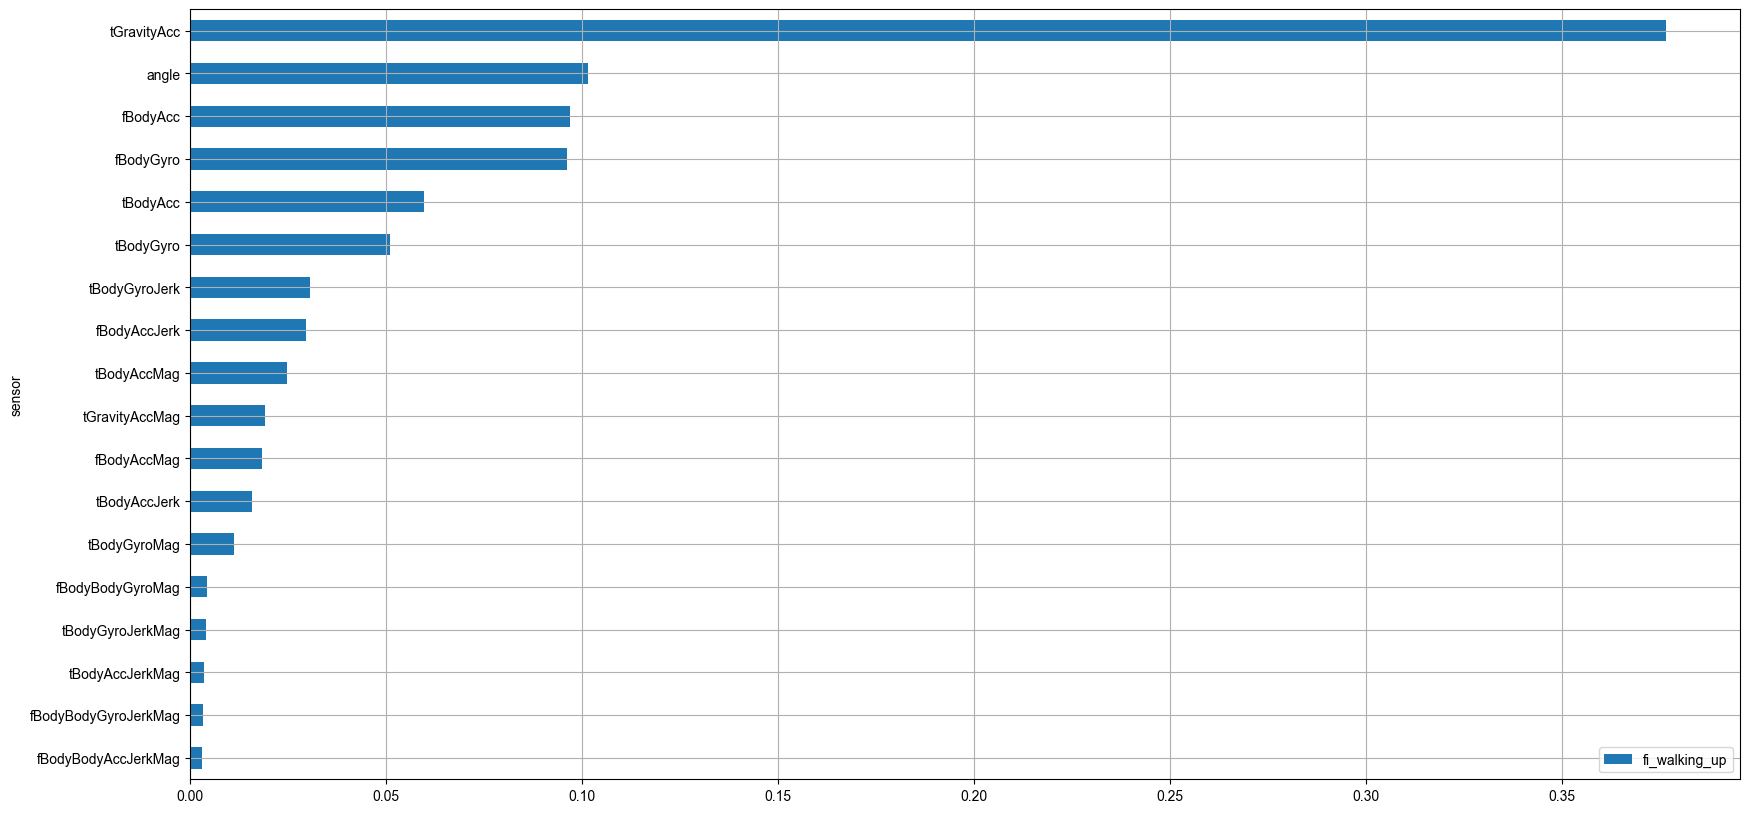

In [84]:
sensor_importance = merged_df.groupby('sensor')[['fi_walking_up']].sum().sort_values('fi_walking_up').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

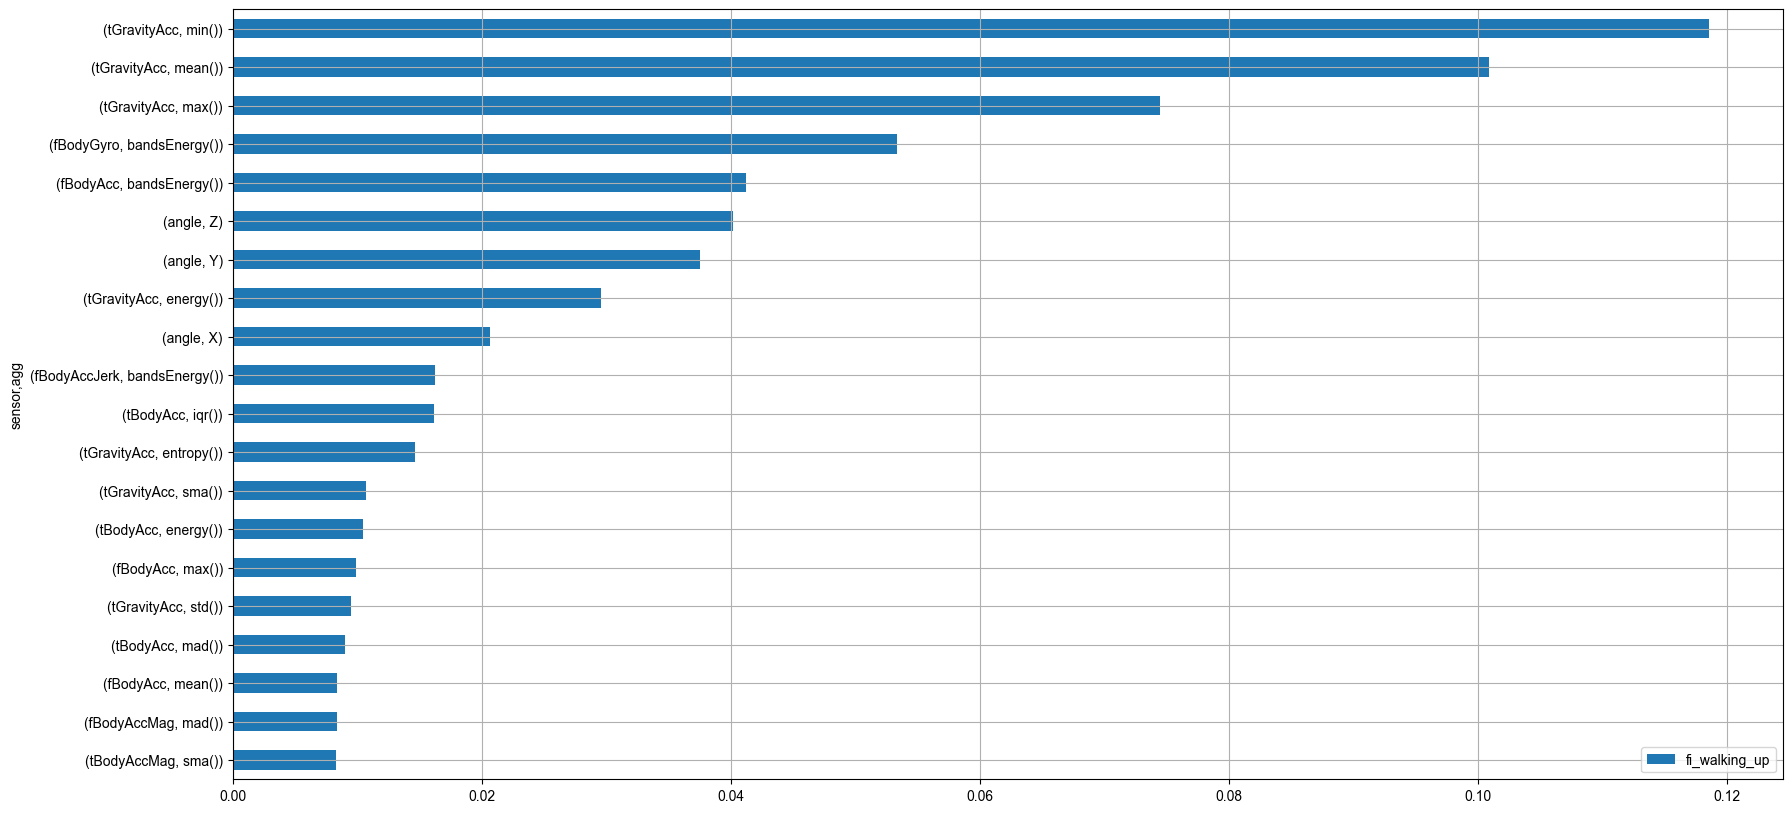

In [85]:
temp = merged_df.groupby(['sensor','agg'])[['fi_walking_up']].sum().sort_values('fi_walking_up')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

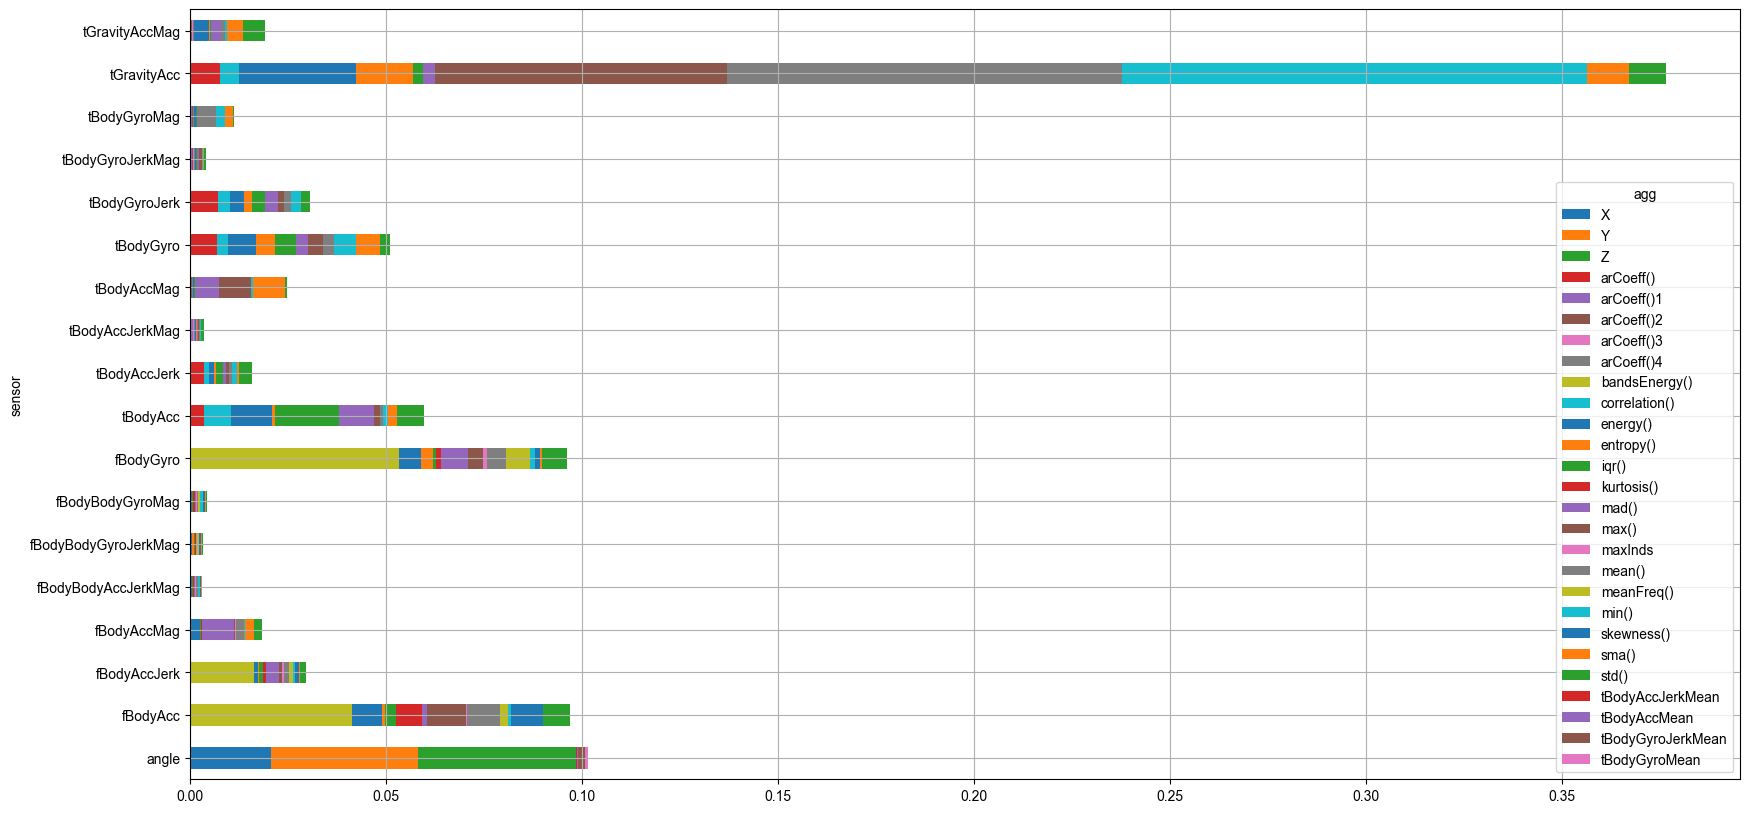

In [86]:
temp = merged_df.groupby(['sensor','agg'])['fi_walking_up'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

### (7) 개별 동작 분석 : is_walking_down


* **세부 요구사항**
    - Target인 Activity를 is_walking_down 변수로 변경하시오.
        * 값 1 : WALKING_DOWNSTAIRS
        * 값 0 : 나머지
    - is_walking_down 을 예측하기 위한 기본 모델을 생성하시오.
        * x, is_walking_down 을 이용하여 train과 validation으로 데이터 분할
        * 기본 모델링
    - is_walking_down 을 구분하는데 중요한 변수 상위 5를 분석하시오.
    - is_walking_down 을 구분하는데 중요한 변수 그룹을 분석하시오.
        * sensor별
        * sensor+agg 별


In [87]:
is_walking_down = y.map({'STANDING':0, 'SITTING':0, 'LAYING':0,
                   'WALKING':0, 'WALKING_UPSTAIRS':0, 'WALKING_DOWNSTAIRS':1})

x_train, x_val, y_train, y_val = train_test_split(x, is_standing, test_size = .3) # test data 30%

model = RandomForestClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_val)

print('accuracy :', accuracy_score(y_val, pred))
print('='*60)
print(confusion_matrix(y_val, pred))
print('='*60)
print(classification_report(y_val, pred))

accuracy : 0.9898016997167138
[[1426    3]
 [  15  321]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1429
           1       0.99      0.96      0.97       336

    accuracy                           0.99      1765
   macro avg       0.99      0.98      0.98      1765
weighted avg       0.99      0.99      0.99      1765



In [88]:
fi = plot_feature_importance(model.feature_importances_, list(x_train), True)
fi = fi.rename(columns={'feature_importance': 'fi_walking_down'})

merged_df = pd.merge(merged_df, fi, on='feature_name', how='outer')

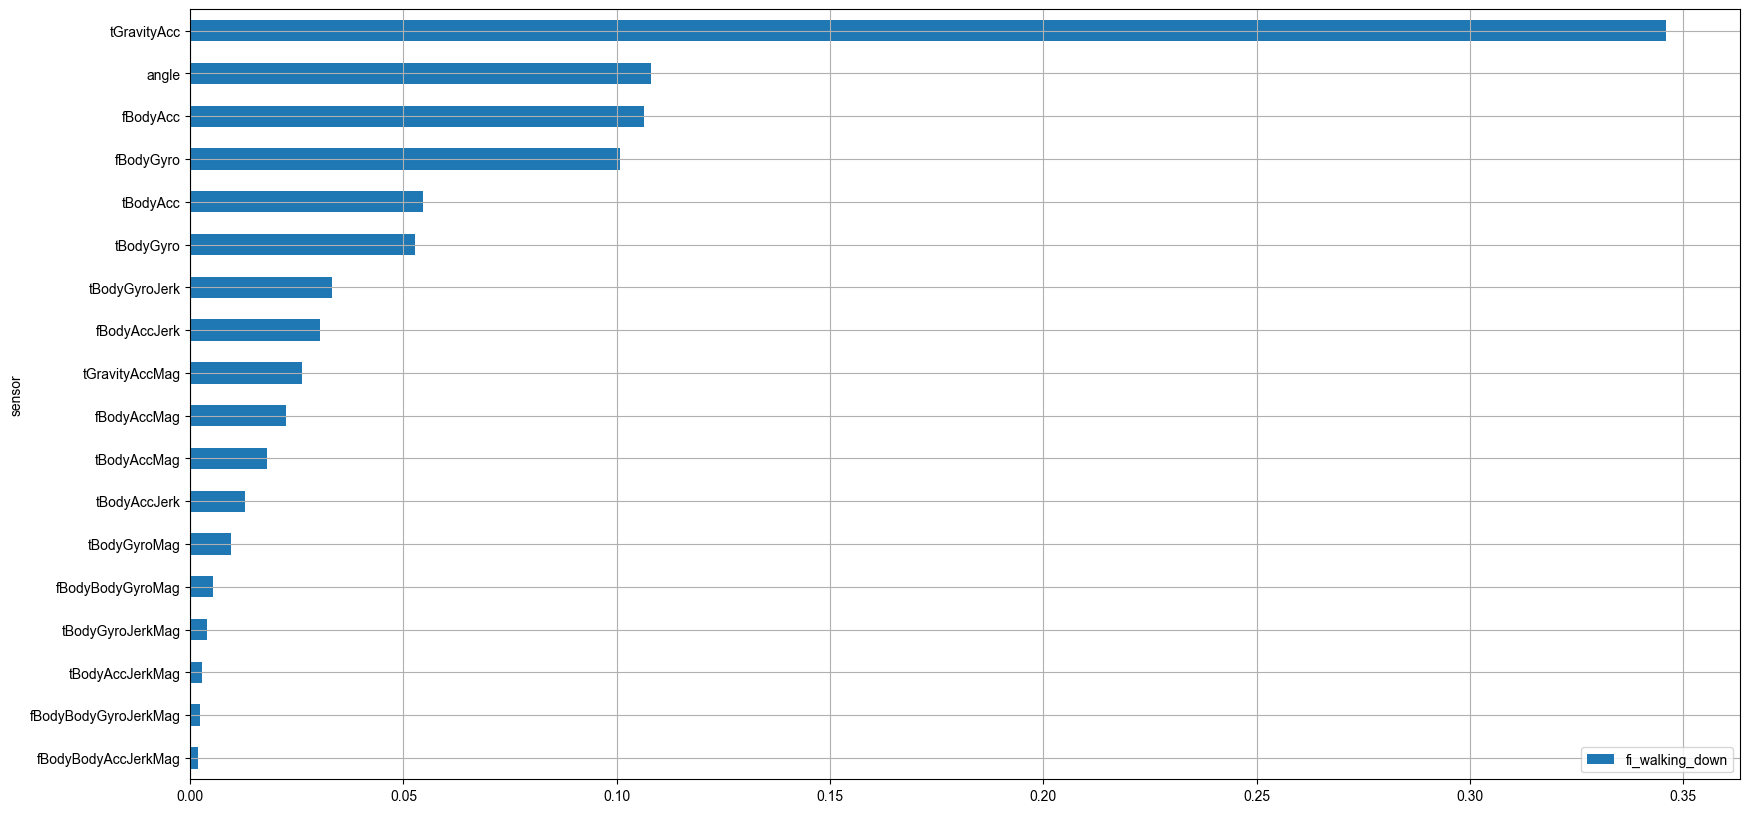

In [89]:
sensor_importance = merged_df.groupby('sensor')[['fi_walking_down']].sum().sort_values('fi_walking_down').plot.barh(figsize=(20,10))
plt.grid()
plt.show()

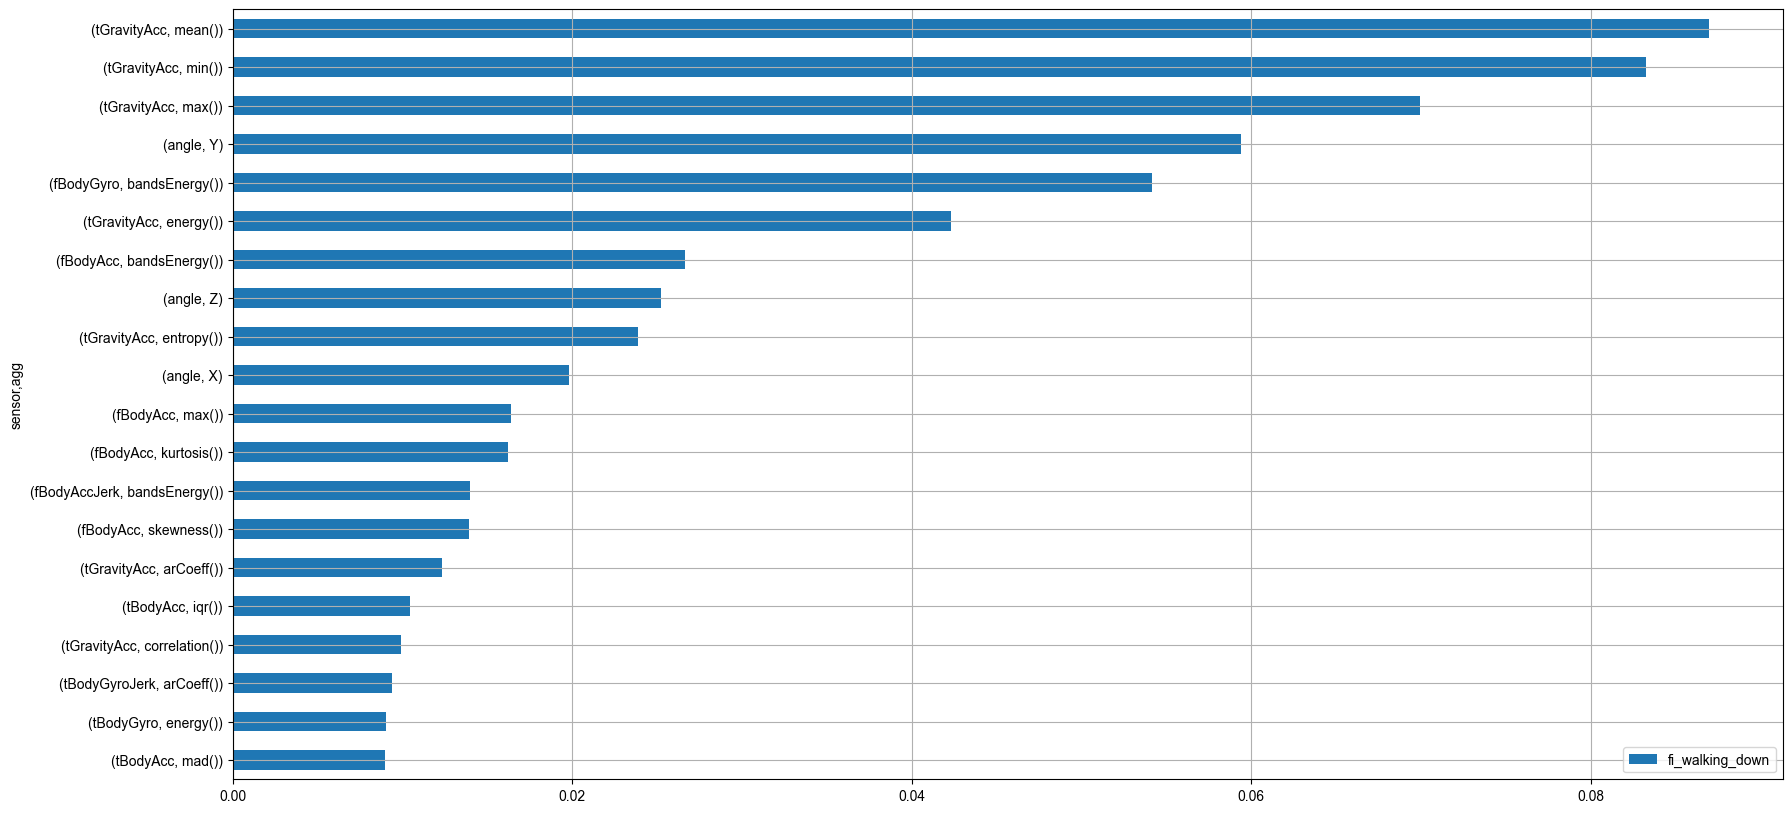

In [90]:
temp = merged_df.groupby(['sensor','agg'])[['fi_walking_down']].sum().sort_values('fi_walking_down')
temp.tail(20).plot.barh(figsize=(20,10))
plt.grid()
plt.show()

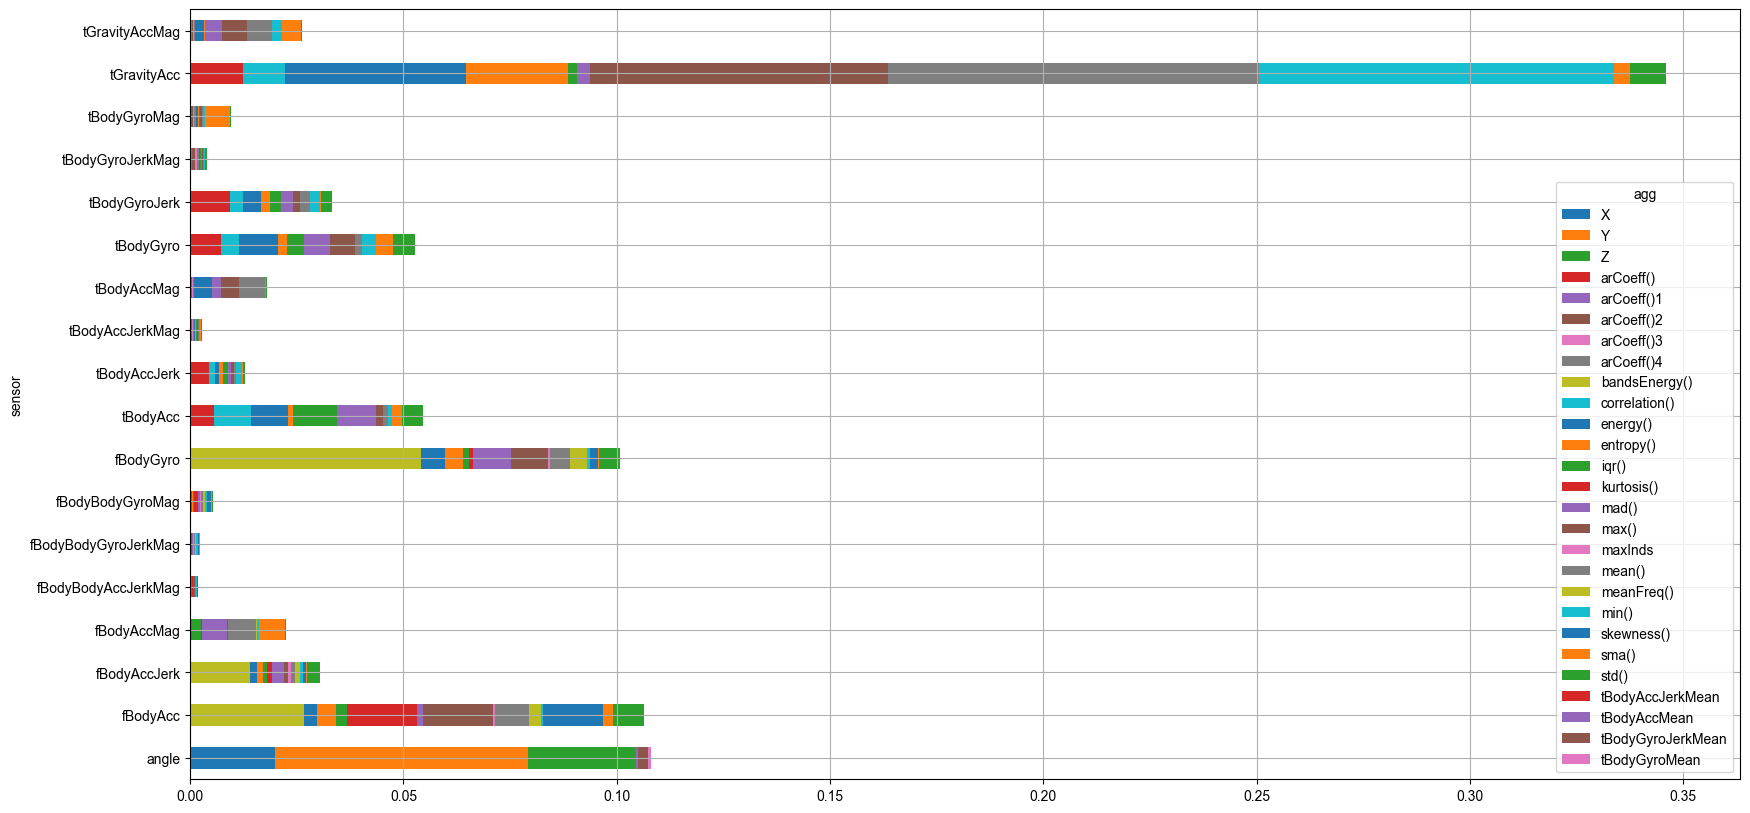

In [91]:
temp = merged_df.groupby(['sensor','agg'])['fi_walking_down'].sum().unstack()
# unstack으로 데이터를 푼 후 stacked를 True로 하여 합쳐서 그래프 그림
temp.plot.barh(stacked=True, figsize=(20,10)) 
plt.grid()
plt.show()

## 5.특성 중요도 저장하기

* **세부 요구사항**
    - 지금까지 변수 중요도를 다양한 관점에서 뽑고 분석을 해 보았습니다.
        - 관점1 : 6개 행동 구분
        - 관점2 : 동적, 정적 행동 구분
        - 관점3 : Standing 여부 구분
        - 관점4 : Sitting 여부 구분
        - 관점5 : Laying 여부 구분
        - 관점6 : Walking 여부 구분
        - 관점7 : Walking_upstairs 여부 구분
        - 관점8 : Walking_downstairs 여부 구분
    - 모든 관점의 변수 중요도를 하나로 합친 후 저장
        - merge를 이용하여 features와 합칩니다.
        - joblib 패키지의 dump를 이용하여 결과를 저장합니다.

In [92]:
merged_df

,sensor,agg,axis,feature_name,fi_all,fi_dynamic,fi_laying,fi_standing,fi_sitting,fi_walking,fi_walking_up,fi_walking_down
0,tBodyAcc,mean(),X,tBodyAcc-mean()-X,0.000220,0.000059,0.000107,0.000126,0.000173,0.000295,0.000253,0.000401
1,tBodyAcc,mean(),Y,tBodyAcc-mean()-Y,0.000181,0.000020,0.000016,0.000300,0.000207,0.000388,0.000304,0.000588
2,tBodyAcc,mean(),Z,tBodyAcc-mean()-Z,0.000061,0.000049,0.000018,0.000270,0.000342,0.000228,0.000202,0.000128
3,tBodyAcc,std(),X,tBodyAcc-std()-X,0.004578,0.009922,0.001451,0.002810,0.006038,0.006572,0.004858,0.001638
4,tBodyAcc,std(),Y,tBodyAcc-std()-Y,0.000188,0.000000,0.000015,0.002045,0.002374,0.000088,0.001931,0.003074
...,...,...,...,...,...,...,...,...,...,...,...,...
586,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.2",0.000190,0.000000,0.000098,0.002401,0.000527,0.000463,0.000248,0.001104
587,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,64.2",0.000187,0.000000,0.000058,0.001029,0.002452,0.000582,0.008023,0.001084
588,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-41,48.1",0.000171,0.000000,0.000106,0.000406,0.000246,0.000078,0.000712,0.000310
589,NaN,NaN,NaN,"fBodyGyro-bandsEnergy()-49,56.1",0.000089,0.000017,0.000000,0.000410,0.000360,0.000332,0.000175,0.000409


In [93]:
joblib.dump(merged_df, 'data_df.pkl')

['data_df.pkl']